In [1]:
# !pip install pytorch_lightning
# !pip install tensorboardX

In [85]:
from collections import namedtuple

import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as td

import pytorch_lightning as pl

import tqdm
import json
import sklearn.metrics as sm

import tensorboardX as tb
import tensorflow as tf
import datetime, os

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(31337)

## Create pairs (first track, subsequent track, time)

In [86]:
!ls env

 Anaconda3-2022.05-Linux-x86_64.sh   Notebooks
 bin				     __pycache__
 DA_GNN				     pyvenv.cfg
 data				     samples
 etc				     share
 FDA_App			     tracks.json
 GAFL.py			     Untitled.ipynb
 lib				    'Vladimir Shaposhnikov.ipynb'
 lib64				     Week4Seminar.ipynb
 lightning_logs


In [87]:
data = pd.read_json("env/data/data.json", lines=True)

In [88]:
tracks = pd.read_json("env/tracks.json", lines=True)

In [63]:
for (_, (artist, title, track)) in tracks.iterrows():
    print(artist, title, track)

Jack Johnson The Cove 0
Billy Preston Nothing from Nothing 1
Paco De Lucia Entre Dos Aguas 2
Josh Rouse Under Cold Blue Stars 3
The Dead 60s Riot Radio (Soundtrack Version) 4
Jorge Drexler 12 segundos de oscuridad 5
Eric Hutchinson Food Chain (Album Version) 6
Kanye West Stronger 7
Jack Johnson Constellations 8
Zero 7 You're My Flame [Album Version] 9
Foo Fighters Learn To Fly 10
Héroes del Silencio Apuesta Por El Rock 'N' Roll 11
Lady GaGa Paper Gangsta 12
Eric Hutchinson You Don't Have To Believe Me (Album Version) 13
Gipsy Kings Soy 14
Josh Rouse Winter In The Hamptons 15
Foo Fighters Stacked Actors 16
Harmonia Sehr kosmisch 17
Army Navy Silvery Sleds (Album Version) 18
Josh Rouse My Love Has Gone 19
Thievery Corporation feat. Emiliana Torrini Heaven's gonna burn your eyes 20
Eric Hutchinson Outside Villanova (Album Version) 21
Jack Johnson / Matt Costa / Zach Gill / Dan Lebowitz / Steve Adams Let It Be Sung 22
Puff Daddy I'll Be Missing You (Featuring Faith Evans & 112)(Album Versi

Octopus Project Hold The Ladder 517
Amoral Year of the Suckerpunch 518
The Knife The Captain 519
Sigur Rós Í Gær 520
Flying Lotus SexSlaveShip 521
Sufjan Stevens The Dress Looks Nice On You 522
Daft Punk Technologic (Vitalic Remix) 523
Justice Carpates 524
Octopus Project Tuxedo Hat 525
LCD Soundsystem Tribulations 526
Four Tet Reversing 527
Sufjan Stevens Romulus 528
Caribou (formerly Dan Snaith's Manitoba) Air Doom 529
Dakis I Mera Tis Giortis Sou (T' Asteria Hathikan Noris) 530
Puppetmastaz Puppetmad 531
Hot Chip So Glad To See You 532
The Knife Silent Shout 533
Fernando Soto Suena tu guitarra 534
Hot Chip Boy From School (Hot Chip Re-Work) 535
Cut Copy Hearts On Fire 536
Meg Baird Willie O'Winsbury 537
Cut Copy Feel The Love 538
Daft Punk Harder Better Faster Stronger ( Breakers Break Remix) 539
Coldplay God Put A Smile Upon Your Face 540
Daft Punk Da Funk (Radio Edit) 541
Sigur Rós Andvari 542
Fatboy Slim Illuminati 543
Daft Punk One More Time (Short Radio Edit) 544
Hot Chip Hold 

Rilo Kiley Three Hopeful Thoughts 1015
Common I Want You 1016
Discovery Swing Tree 1017
Andrew Bird Heretics 1018
Eisley Memories (Album Version) 1019
The Kills Tape Song 1020
Blockhead Insomniac Olympics 1021
Hearts of Black Science 40 Days 1022
Lily Allen Littlest Things (Live At The Astoria) 1023
Blockhead You've got Maelstrom 1024
Andrew Bird The Supine 1025
Rilo Kiley Dreamworld (Album Version) 1026
Marina And The Diamonds Oh No! (album version) 1027
Foals Spanish Sahara 1028
Edward Sharpe & The Magnetic Zeros Home 1029
Eisley Marvelous Things (Album Version) 1030
Delta Spirit Streetwalker 1031
Yelle Tristesse/Joie 1032
M83 In The Cold I'm Standing 1033
Cass McCombs feat. Karen Black Dreams-Come-True-Girl 1034
Maroon 5 Not Falling Apart 1035
The Shins Phantom Limb (Album) 1036
Rilo Kiley The Good That Won't Come Out 1037
Marina And The Diamonds The Outsider (album version) 1038
Carleen Anderson Maybe I'm Amazed/Highlands Part II (Interlude) 1039
Morcheeba Women Lose Weight (Feat: 

New Found Glory Tangled Up 1477
Selena Gomez Disappear 1478
Eminem / Nate Dogg 'Till I Collapse 1479
Carnal Forge Decades Of Despair 1480
Smile Empty Soul Bottom of a Bottle (Explicit Album Version) 1481
Incubus Wish You Were Here 1482
Metallica Enter Sandman 1483
Avril Lavigne My Happy Ending 1484
Owl City Dental Care 1485
Kid Cudi Vs Crookers Day 'N' Nite 1486
Justin Bieber One Time 1487
Linkin Park Crawling (Album Version) 1488
Lady GaGa Monster 1489
Lady GaGa / Colby O'Donis Just Dance 1490
Justin Bieber Down To Earth 1491
Fat Joe Lean Back [Remix feat. Lil Jon_ Eminem_ Mase & Remy Martin] (Album Version - Amended) 1492
Nickelback Far Away (Album Version) 1493
Everclear When It All Goes Wrong Again 1494
Justin Bieber U Smile 1495
Bon Jovi Livin' On A Prayer 1496
The All-American Rejects Gives You Hell 1497
Sean Kingston and Justin Bieber Eenie Meenie 1498
Justin Bieber Love Me 1499
Eminem / Dina Rae Superman 1500
Radiohead Karma Police 1501
Skillet Imperfection (Album Version) 1502

Silvio Rodríguez Ojalá 1994
O'Rosko Raricim Terre Promise 1995
Jack Johnson Breakdown 1996
Justin Bieber Up 1997
LMFAO / Lil Jon Shots 1998
Survivor Eye Of The Tiger 1999
Justin Bieber / Jessica Jarrell Overboard 2000
Flogging Molly The Seven Deadly Sins 2001
Flogging Molly Drunken Lullabies 2002
Dropkick Murphys Johnny_ I Hardly Knew Ya 2003
Jack Johnson Better Together 2004
Aerosmith Dream On 2005
Mariah Carey Heartbreaker/"If You Should Ever Be Lonely 2006
Leila Pinheiro Desenredo (G.R.E.S.Unidos Do Pau Brasil) 2007
The Boxmasters Heartbreakin' Wreck 2008
Mariah Carey Dreamlover 2009
Chris Bathgate Coda 2010
Brant Bjork Searchin' 2011
Stars This Charming Man 2012
Enya Deireadh An Tuath 2013
Enya Silver Inches 2014
Enya Flora's Secret 2015
Enya The Longships 2016
Enya Boadicea 2017
Enya Cursum Perficio (Remastered 2009) 2018
Enya Epona 2019
Enya Evacuee 2020
Justin Timberlake LoveStoned/I Think She Knows 2021
Justin Timberlake Let's Take A Ride 2022
Enya Bard Dance 2023
Enya Only Tim

Racey I Believed You 2459
Cass McCombs That's That 2460
Kings Of Leon The Runner 2461
Maroon 5 / Cross If I Never See Your Face Again 2462
Redman Jam 4 U 2463
Seventh Star Your Pleasure_ My Pain 2464
Hot Chip Touch Too Much 2465
Hot Chip Don't Dance 2466
King Kobra Shadow Rider 2467
The Popes Pump Action Paddy 2468
Skye Sweetnam Sharada 2469
Röyksopp Only This Moment (Röyksopps Forsiktige Massasje) 2470
M.I.A. Galang 2471
Kaiser Chiefs Retirement 2472
Daniel Bedingfield The Way 2473
Modjo Lady (Hear Me Tonight) 2474
Hot Chip Wrestlers 2475
Psychic Ills Red-Split 2476
The Killers Spaceman 2477
The Presidents of the United States of America Tiger Bomb 2478
Yeasayer Ambling Alp (Memory Tapes Remix) 2479
The Hives The Stomp 2480
Cobra Starship Kiss My Sass [feat. Travis McCoy of Gym Class Heroes] (Album Version) 2481
Telefon Tel Aviv Helen Of Troy 2482
The Rapture First Gear 2483
Stars The Vanishing 2484
Panic! At The Disco The Only Difference Between Martyrdom and Suicide Is Press Coverag

Damien Rice Cannonball 2938
Alliance Ethnik Sincerité Et Jalousie 2939
Southside Spinners Luvstruck 2940
Will Young Leave Right Now 2941
3 Doors Down Let Me Be Myself 2942
matchbox twenty Unwell (Album Version) 2943
You Me At Six Liquid Confidence 2944
John Mayer Why Georgia 2945
John Mayer All We Ever Do Is Say Goodbye 2946
Will Young Who Am I 2947
Tom Petty And The Heartbreakers Breakdown (Album Version) 2948
Peggy Zina Ftes 2949
Jason Mraz The Remedy (I Won't Worry) (New EQ'd LP Version) 2950
Creed My Sacrifice 2951
Darc Mind Where I've Alwayz Been 2952
Haloo Helsinki! Elävät ja kuolleet 2953
Foo Fighters What If I Do? 2954
Chaka Khan Chaka Khan Through The Fire 2955
Plastilina Mosh Niño Bomba 2956
Frightened Rabbit Not Miserable 2957
Booka Shade Mandarine Girl 2958
Underworld Born Slippy 2959
Plastilina Mosh Afroman 2960
Pearl Jam Oceans 2961
Postal Service Nothing Better (Album) 2962
Iron Maiden Tailgunner (1998 Digital Remaster) 2963
Misty In Roots Dreadful Dread (2002 Digital Re

Underworld Cups 3425
Arctic Monkeys Still Take You Home 3426
Zion / Akon The Way She Moves 3427
John Powell Jason Phones It In 3428
Bob Marley & The Wailers Forever Loving Jah 3429
John Powell To The Roof 3430
Bo Hansson Lothlorien (2002 Digital Remaster) 3431
Alien Ant Farm Universe 3432
Little Anthony & The Imperials Hurt 3433
Klaus Doldinger's Passport Fairy Tale 3434
Alison Krauss / Union Station Restless 3435
Keith Martin Why Can't It be 3436
Cherish featuring Yung Joc Killa 3437
US3 Featuring Rahsaan And Gerard Presencer Cantaloop (Flip Fantasia) 3438
Jonny Lang Lie To Me 3439
Agnostic Front Strength 3440
Eagle-Eye Cherry / Neneh Cherry Long Way Around 3441
Charles Wright Express Yourself 3442
Air Supply The Earth Is (Album Version) 3443
NARNIA Back from hell 3444
Aretha Franklin Hello Sunshine 3445
Led Zeppelin Ten Years Gone  (Album Version) 3446
Ed Thigpen / Oscar Peterson / Ray Brown Happy-Go-Lucky Local 3447
Morella's Forest Falling 3448
Herbie Hancock Far Out 3449
Vanessa H

La Renga Panic Show 3921
Inti Illimani El Arado 3922
Los Prisioneros Cuentame Una Historia Original 3923
Violeta Parra Volver a los 17 3924
Red Hot Chili Peppers Under The Bridge (Album Version) 3925
La Renga Cuando Estés Acá 3926
Los Prisioneros La Voz De Los '80 3927
La Renga Paja Brava 3928
Plan B She Said 3929
La Renga Bien Alto 3930
La Renga Tripa y Corazón 3931
La Renga El Revelde 3932
Los Prisioneros Independencia Cultural 3933
Los Prisioneros Pa Pa Pa 3934
Violeta Parra Que dira el santo padre 3935
The Doors People Are Strange 3936
Los Jaivas Pregon Para Iluminarse 3937
Violeta Parra Qué Pena Siente El Alma 3938
Red Hot Chili Peppers Otherside (Album Version) 3939
Inti Illimani Alturas 3940
Sam & Dave When Something Is Wrong With My Baby 3941
La Renga Triste Canción De Amor 3942
The Mercury Program Fragile or Possibly Extinct 3943
Los Prisioneros Sexo 3944
Los Prisioneros Es Demasiado Triste 3945
The Disco Boys B-B-B-Baby 3946
La Renga Lo Frágil De La Locura 3947
La Renga Balad

Freddy Cannon Way Down Yonder In New Orleans 4346
Slash Doctor Alibi (featuring Lemmy Kilmister) 4347
Turisas Rasputin 4348
Cascada Can't Stop The Rain 4349
Super700 S.T.T.S.M.C. (Somebody Tried To Steal My Car) 4350
tobyMac Momentum 4351
Coldplay One I Love 4352
Ximena Sarinana Normal 4353
London After Midnight Demon 4354
Valerio Scanu Ricordati Di Noi 4355
Ximena Sarinana Gris 4356
Ligeia Wishing Wells 4357
The xx Fantasy 4358
Vampire Weekend M79 (Album) 4359
Vampire Weekend Horchata 4360
Vampire Weekend Bryn (Album) 4361
The xx Infinity 4362
Vampire Weekend Walcott (Album) 4363
Vampire Weekend The Kids Dont Stand A Chance (Album) 4364
Gorillaz Empire Ants (Feat. Little Dragon) 4365
Sugababes Overload 4366
Crystal Castles Celestica 4367
Björk It's Not Up to You 4368
Deftones Back To School (Mini Maggit) (LP Version) 4369
Franz Ferdinand This Fire 4370
Arctic Monkeys Fake Tales Of San Francisco 4371
Ashley MacIsaac Captain America 4372
Gorillaz Rhinestone Eyes 4373
Four Tet First Thi

Regina Spektor Human Of The Year (Album Version) 4827
Vampire Weekend Holiday 4828
The Roots Don't See Us 4829
The Roots / Erykah Badu You Got Me 4830
Children Of Bodom Taste Of My Scythe 4831
The Specials Monkey Man 4832
K'Naan Take A Minute 4833
Digable Planets Jimmi Diggin' Cats 4834
Portugal The Man Sugar Cinnamon (Album) 4835
Telefon Tel Aviv Your Every Idol 4836
Sun Kil Moon Glen Tipton 4837
Portugal The Man Church Mouth (Album) 4838
The Strokes Reptilia 4839
Tokyo Police Club If It Works 4840
Portugal The Man Bellies Are Full (Album) 4841
Vector Lovers Solitaire 4842
Telefon Tel Aviv I Made A Tree On The Wold 4843
The Platters Only You (And You Alone) 4844
In Flames December flow 4845
Portugal The Man My Mind (Album) 4846
Pinback Boo 4847
The Dodos A Time To Die 4848
The Roots The Spark 4849
Telefon Tel Aviv Your Mouth 4850
Beats Antique Dope Crunk 4851
Tokyo Police Club Citizens Of Tomorrow 4852
At The Drive-In Non-Zero Possibility 4853
Beats Antique Beauty Beats 4854
Snot Stoo

Eric Clapton / B.B. King Worried Life Blues (Album Version) 5313
John Butler Trio Losing You (Album Version) 5314
RJD2 A Beautiful Mine 5315
John Butler Trio Betterman (full-length/album version) 5316
Neil Young Old Man (Album Version) 5317
Jimmy Cliff You Can Get It If You Really Want 5318
Cat Stevens Blackness Of The Night 5319
Eisbrecher Adrenalin 5320
Godsmack Speak 5321
Bon Iver Creature Fear 5322
Bon Iver For Emma 5323
Josh Ritter Lantern 5324
Bo Kaspers Orkester Undantag 5325
Edward Sharpe & The Magnetic Zeros Janglin 5326
Beyoncé Get Me Bodied 5327
Sham 69 Borstal Breakout 5328
OIO AI Jardim Das Estátuas 5329
Fred Fortin T'es grosse pis t'es belle 5330
Diabolical Masquerade Ravendusk In My Heart 5331
Despina Vandi Gia 5332
Jill Scott Love Rain 5333
Johnny Otis Willie And The Hand Jive 5334
Ryan Adams The Shadowlands 5335
Black Eyed Peas Head Bobs 5336
Céline Dion Declaration Of Love 5337
Katy Perry I'm Still Breathing 5338
Alicia Keys Featuring Beyoncé Knowles Put It In A Love 

Mac Lethal Know it All 5836
Lauryn Hill Featuring Carlos Santana To Zion 5837
Melanie Fiona Give It To Me Right 5838
Smokie Norful Run Til I Finish 5839
Monica featuring Dem Franchize Boyz Everytime Tha Beat Drop 5840
Yolanda Adams Never Give Up (LP Version) 5841
Brandy Almost Doesn't Count ( LP Version ) 5842
Destiny's Child featuring Missy Elliott Confessions (featuring Missy Elliott) 5843
Chrisette Michele Blame It On Me 5844
Curiosity Killed The Cat Down To Earth 5845
Whitney Houston I'm Every Woman 5846
Brandy He Is (album version) 5847
Lauryn Hill Featuring D'Angelo Nothing Even Matters 5848
The Brecker Brothers Dig A Little Deeper 5849
Chris Brown featuring T-Pain Kiss Kiss 5850
Kirk Franklin & The Family Now Behold The Lamb 5851
Crosby_ Stills & Nash Cathedral   (LP Version) 5852
Peer Günt Trouble In Deep South 5853
Glen Hansard & Marketa Irglova Falling Slowly (Album version) 5854
Peter Tosh Fight On (2002 Digital Remaster) 5855
The Blues Brothers Jailhouse Rock 5856
Armando M

Black Moth Super Rainbow String Tulips 6381
Kid Cudi Day 'N' Nite 6382
Kings Of Convenience Surprise Ice 6383
RJD2 Inhale Remix (Instrumental) 6384
Creedence Clearwater Revival Bad Moon Rising 6385
Prodigy No Man Army Feat. Tom Morello 6386
Paramore When It Rains (Album Version) 6387
Nine Inch Nails Last 6388
Charlie Louvin Are You Teasing Me 6389
The Prodigy Charly (Trip Into Drum And Bass Version) (Remastered) 6390
Copywrite F*ck Soundcheck 6391
UNKLE Featuring Gavin Clark Against The Grain (Redux) 6392
Gang Gang Dance Egowar 6393
Jim Lauderdale/Ralph Stanley & The Clinch Mountain Boys I Wish Today Could Be Tomorrow 6394
RJD2 Hand-Me-Downs (Instrumental) 6395
Kings Of Convenience Peacetime Resistance 6396
Kings Of Convenience The Eternal 6397
Kings Of Convenience The Weight Of My Words (Four Tet Instrumental) 6398
Kings Of Convenience Parallel Lines 6399
RJD2 I'm Free (Instrumental) 6400
Kings Of Convenience Renegade 6401
Prodigy Youll Be UNDER MY WHEELS 6402
Arcade Fire Neighborhoo

Blitzen Trapper God & Suicide 6934
The Avett Brothers Incomplete And Insecure 6935
The Avett Brothers It Goes On And On 6936
Vader Black Metal 6937
Blitzen Trapper Sleepytime in the Western World 6938
The Avett Brothers The Ballad Of Love And Hate 6939
Blitzen Trapper Love U 6940
The Avett Brothers The Perfect Space 6941
The Avett Brothers Die Die Die 6942
The Avett Brothers Pretty Girl From Chile 6943
The Avett Brothers Laundry Room 6944
Blitzen Trapper Fire & Fast Bullets 6945
Killing Floor Come Home Baby 6946
Will Young Light My Fire 6947
Blitzen Trapper Furr 6948
Blitzen Trapper Gold For Bread 6949
The Avett Brothers Slight Figure Of Speech 6950
Blitzen Trapper Stolen Shoes & a Rifle 6951
The Avett Brothers Go To Sleep 6952
Blitzen Trapper Black River Killer (Album) 6953
The Avett Brothers One Line Wonder 6954
Blitzen Trapper Not Your Lover 6955
Thom Yorke Black Swan 6956
Thom Yorke Analyse 6957
The Avett Brothers My Last Song To Jenny 6958
Framing Hanley It's Not What They Said 69

Air Cherry Blossom Girl (Fanny Demo Version) 7486
Camera Obscura A Sisters Social Agony 7487
Bright Eyes Clairaudients (Kill Or Be Killed) 7488
TV On The Radio Lovers Day 7489
White Rabbits While We Go Dancing 7490
The Steep Canyon Rangers Knob Creek 7491
Judy Cheeks So In Love (The Real Deal) (Frankie Foncett Vocal Mix) 7492
Andrew Bird Wishing For Contentment (Album Version) 7493
the bird and the bee Lifespan Of A Fly 7494
Caribou (formerly Dan Snaith's Manitoba) Anna & Nina 7495
Neutral Milk Hotel You've Passed 7496
Irene Cara What A Feeling 7497
Man Man Zebra 7498
Camera Obscura Come Back Margaret 7499
Soltero Michael 7500
Carla Bruni At Last The Secret Is Out (Album) 7501
Man Man I_ Manface 7502
Neutral Milk Hotel Gardenhead / Leave Me Alone 7503
Stars The Ghost Of Genova Heights 7504
Rocky Votolato In a Cabin 7505
Stars My Radio (AM Mix) 7506
Menomena Rotten Hell 7507
Carla Bruni I Went To Heaven (Album) 7508
Belle and Sebastian Expectations 7509
The Steep Canyon Rangers Black R

Abdoulaye Diabaté Mimi 7974
Lamb Scratch Bass 7975
Ivan Ferreiro Canciones para el tiempo y la distancia 7976
Abdoulaye Diabaté Nina 7977
Aesop Rock We're Famous (feat. El-P) 7978
Abdoulaye Diabaté Matamani 7979
Devo (I Can't Get Me No) Satisfaction 7980
Parkway Drive Don't Close Your Eyes 7981
The Notorious B.I.G. Would You Die For Me (Featuring Lil' Kim & Puff Daddy) (Album Version) 7982
Huey Lewis & The News Bad Is Bad 7983
Ludacris / Nate Dogg Area Codes 7984
Huey Lewis And The News Buzz Buzz Buzz 7985
Abdoulaye Diabaté Miriya 7986
Huey Lewis & The News Honky Tonk Blues 7987
Alice In Chains Them Bones 7988
Eminem FACK 7989
Shaggy Boombastic 7990
P!nk Glitter In The Air 7991
Erasure Always (7'' Mix) 7992
Steve Goodman The One That Got Away 7993
Iron And Wine House By the Sea (Album) 7994
Youngbloodz Featuring Lil' Jon Damn! 7995
Spoon The Underdog (Album version) 7996
Iron And Wine Pagan Angel and a Borrowed Car (Album) 7997
Atmosphere Godlovesugly 7998
Streetlight Manifesto On & On

Marisa Monte A Alma E A Materia 8459
Christopher Cross Say You'll Be Mine (Album Version) 8460
General Electrics Tu m'intrigues (with Sarah) 8461
Hocus Pocus / Omar Smile 8462
Eric Johnson Your Sweet Eyes 8463
Pat Metheny Group Dream of the Return 8464
Radiohead Melatonin 8465
Bruce Springsteen I'm On Fire 8466
The Animals Don't Let Me Be Misunderstood 8467
Moguai Get:On 8468
Aghast View Groundzero (Original Version) 8469
Pat Metheny_ Lyle Mays_ Mark Egan_ Dan Gottlieb Jaco 8470
The Animals We've Gotta Get Out Of This Place 8471
Cream I'm So Glad 8472
Cream Crossroads 8473
The Moody Blues Tuesday Afternoon 8474
The Animals I'm Crying 8475
Derek & The Dominos Tell The Truth 8476
The Yardbirds Happenings Ten Years Time Ago 8477
Derek & The Dominos Why Does Love Got To Be So Sad 8478
Pat Metheny_ Lyle Mays_ Mark Egan_ Dan Gottlieb April Joy 8479
Derek & The Dominos Have You Ever Loved A Woman 8480
Jack Johnson We're Going To Be Friends 8481
Jack Johnson Supposed To Be 8482
Bruce Springste

A-Ha Touchy! (Album Version) 8965
Mando Diao Blue Lining_ White Trenchcoat 8966
Foo Fighters Low 8967
Gram Parsons She (Remastered Album Version) 8968
Los Abuelos De La Nada Así Es El Calor 8969
Foo Fighters Razor 8970
Mew The Zookeeper's Boy 8971
João Gilberto Ave Maria No Morro 8972
Beirut The Akara 8973
Ólafur Arnalds Ljósið 8974
Nine Inch Nails Right Where It Belongs 8975
Angus & Julia Stone A Book Like This 8976
Toto La Momposina Mapale 8977
Buena Vista Social Club Amor de Loca Juventud 8978
Toto La Momposina Dos De Febrero 8979
Jamiroquai Space Cowboy 8980
Jamiroquai Emergency On Planet Earth 8981
Joy Division The Eternal 8982
Joy Division Digital 8983
Jamiroquai Little L 8984
Jamiroquai Stop Don't Panic 8985
UB40 Sing Our Own Song 8986
Joy Division Dead Souls [Re-mastered] 8987
Joy Division Shadowplay 8988
Jamiroquai Black Crow 8989
UB40 Groovin' (Out On Life) 8990
Phoenix Rome 8991
Toto La Momposina La Candela Viva 8992
Joy Division Isolation 8993
Joy Division Day Of The Lords 

John Brown\'s Body Resonate 9426
Ester Drang Valencia's Dying Dream 9427
Kanye West Bad News 9428
Collie Buddz Blind To You 9429
Strike Anywhere The Promise 9430
Snoop Dogg Sexual Eruption 9431
Twista Pimp Like Me (Amended Album Version) 9432
Mike Jones Next To You   (Explicit Album Version) 9433
Pretty Ricky Late Night Special (explicit album version) 9434
Warren G Runnin' Wit No Breaks 9435
2Pac featuring Dramacydal Outlaw 9436
Keith Sweat Twisted (LP Version) 9437
Aerosmith Pink 9438
Ying Yang Twins Bedroom Boom (Feat. Avant) 9439
Dr. Dre / Eminem / Alvin Joiner What's The Difference 9440
Lil Rob Summer Nights 9441
Red Hot Chili Peppers Taste The Pain 9442
Cold No One 9443
Thievery Corporation The Numbers Game 9444
Binary Star Evolution Of Man 9445
Gallows Crucifucks (Album Version) 9446
Soul II Soul How Long 9447
Gang Starr Royalty 9448
Nas / Damian "Jr. Gong" Marley Dispear 9449
Young Money Roger That 9450
The Police Once Upon A Daydream 9451
Foghat Comin' Down With Love 9452
Plie

Buckcherry Dreams (Explicit) 9875
Theory Of A Deadman Confession (Album Version) 9876
CKY Sink Into The Underground 9877
Steel Pulse K.K.K. 9878
Creed Signs 9879
Lo-Pro Not Me 9880
Drowning Pool All Over Me 9881
Finger Eleven Absent Elements 9882
Staind Reply (Album Version) 9883
Cold The Day Seattle Died 9884
Lifehouse Easier To Be 9885
Theory Of A Deadman Hello Lonely (Walk Away From This) (Album Version) 9886
Duran Duran All She Wants Is 9887
Shinedown Son Of Sam (Bonus Version) 9888
Puddle Of Mudd Away From Me 9889
CKY Flesh Into Gear 9890
Wildbirds & Peacedrums I Can't Tell In His Eyes 9891
Theory Of A Deadman Sacrifice 9892
Drowning Pool Killin' Me 9893
Warren Zevon Mohammed's Radio [Solo Piano Demo] 9894
Stone Temple Pilots Black Again (LP Version) 9895
CKY Escape From Hellview 9896
Chevelle Dos (LP Version) 9897
Fuel 238 Untitled** 9898
Saigon Kick Come Take Me Now (LP Version) 9899
Daughtry Breakdown 9900
Lindsay Lohan I Live For The Day 9901
Slipknot Gently (Album Version) 99

Bebel Gilberto August Day Song 10357
Jay & The Americans Some Enchanted Evening 10358
Cibelle So Sei Viver No Samba 10359
The Acacia Strain 4X4 10360
2Pac Lord Knows 10361
Bebel Gilberto So Nice (Summer Samba) 10362
The Ark Trust Is Shareware 10363
Stefanie Heinzmann The Unforgiven 10364
Wilson Simonal Não Vem Que Não Tem (Nem Vem Que Não) (1997 Digital Remaster) 10365
Bebel Gilberto Simplesmente 10366
A Perfect Circle The Nurse Who Loved Me 10367
Bebel Gilberto Samba E Amor 10368
Airbourne Too Much_ Too Young_ Too Fast 10369
Johnny Foreigner Lea Room 10370
Alanis Morissette Forgiven (Acoustic Album Version) 10371
Probot feat. Lemmy Shake Your Blood 10372
A Perfect Circle The Package 10373
A Perfect Circle Thinking Of You 10374
Bebel Gilberto August Day Song - King Britt Remix 10375
Stray Cats Fishnet Stockings 10376
Brian Eno And Then So Clear (Album Version) 10377
Nick Cave & The Bad Seeds Henry Lee 10378
Muse Sober 10379
Zeca Baleiro Telegrama 10380
Soilwork Figure Number Five 10381

Alcatrazz Stripper 10831
Ani DiFranco Grey (from Revelling Reckoning) 10832
Billy Pilgrim Falling Apart (LP Version) 10833
Hausmylly TAVALLINEN TARINA 10834
Victor Jara En Algún Lugar Del Puerto (2001 Digital Remaster) 10835
Johnny & the Hurricanes Red River Rock 10836
JoJo Let It Rain 10837
Zee Avi Bitter Heart 10838
Feist My Moon My Man 10839
Rufus Wainwright Beauty Mark 10840
She & Him I Was Made For You 10841
She & Him I Thought I Saw Your Face Today 10842
Yeah Yeah Yeahs Faces 10843
Feist The Water 10844
Beirut La Banlieue 10845
Zee Avi Just You And Me 10846
Yeah Yeah Yeahs Skeletons 10847
Feist Past In Present 10848
Zee Avi I Am Me Once More 10849
Yeah Yeah Yeahs Dull Life 10850
Feist The park 10851
Beirut The Flying Club Cup 10852
Zee Avi Darling 10853
Carla Bruni Quelqu'un M'a Dit (Album Version) 10854
Zee Avi Honey Bee 10855
She & Him Sentimental Heart 10856
Zee Avi Kantoi 10857
Fluke Bermuda 10858
Gwen Stefani Wind It Up 10859
Yael Naïm Levater 10860
Zee Avi Is This The End 1

Lil Wayne / Shanell American Star 11350
Aly & AJ Potential Breakup Song 11351
Arch Enemy Aces High 11352
Fergie Labels Or Love 11353
Fergie / Will.I.Am Fergalicious 11354
Jordin Sparks Shy Boy 11355
K'naan / Chubb Rock ABC's 11356
Thousand Foot Krutch Falls Apart 11357
David Rush / Pitbull / Kevin Rudolf / LMFAO Shooting Star 11358
Fergie / Ludacris Glamorous 11359
Stacie Orrico So Pray (Genuine Album Version) 11360
Adoniran Barbosa - Com Nosso Samba Acende O Candieiro (2003 Digital Remaster) 11361
Shakira Un Poco De Amor 11362
Andrea Bocelli Cuando Me Enamoro (Quando M'Innamoro) 11363
Maelo Ruiz No Te Quites La Ropa 11364
Eels Vice President Fruitley 11365
Havok Path to Nowhere 11366
Magna Cum Laude Ide elég lesz ez a sor 11367
Ramones 53rd & 3rd   (Remastered Version ) 11368
Grupo Gale Mi Vecina 11369
Camila Todo Cambio 11370
Shakira Que Me Quedes Tu 11371
Soundgarden Fell On Black Days 11372
Hombres G Que soy yo para ti (Radio edit) 11373
Blu Cantrell Featuring Foxy Brown Hit 'Em Up

Sanalejo Amapola 11806
New Found Glory Sincerely Me 11807
Alesha Dixon The Boy Does Nothing 11808
Blink-182 Story Of A Lonely Guy 11809
Alice In Chains Check My Brain 11810
Green Day Holiday [feat. Green Day & The Cast Of American Idiot] (Album Version) 11811
Blink-182 Dumpweed 11812
HIM Vampire Heart (Album Version) 11813
Bon Jovi We Weren't Born To Follow 11814
Dimmu Borgir Devil's path 11815
New Order Let's Go [from 'Salvation'] 11816
The Cars Magic (LP Version) 11817
Blink-182 Going Away To College 11818
+44 Lycanthrope 11819
Usher featuring T.I. Guilty 11820
Keyshia Cole Love 11821
Sir Doum's Mali-Haine (feat.Jay_Kedjo) 11822
JoJo Like That 11823
The Powder Monkeys The Wizard 11824
New Boyz Cricketz [feat. Tyga] (Explicit Album Version) 11825
Chris Brown I'll Call Ya 11826
Pretty Ricky Peer Pressure (explicit album version) 11827
Wizzard I Wish It Could Be Christmas Everyday 11828
Yes Awaken 11829
Lupe Fiasco Paris_ Tokyo (Explicit Album Version) 11830
Justin Bieber Common Denomin

Ryan Leslie Valentine 12322
Burt Bacharach Nikki 12323
MxPx Invitation To Understanding 12324
Gato Perez Ebrios De Soledad (Album Version) 12325
Andrea Bocelli / Marta Sanchez Vivo Por Ella (Vivo Per Lei) 12326
Andrea Bocelli Con Te Partirò 12327
Andrés Cepeda Me Voy 12328
John Mayer The Heart Of Life 12329
The Ataris Between You And Me 12330
Faust Giggy Smile 12331
Underworld Teardrop 12332
Lupe Fiasco Hurt Me Soul (Explicit Album Version) 12333
Bobby Valentino Tell Me 12334
Aventura Ella y yo (featuring Don Omar) 12335
Estopa Era 12336
Metronomy Heartbreaker 12337
Fun Lovin' Criminals I'm Not In Love 12338
Little Boots Earthquake (album version) 12339
Little Boots Meddle 12340
Wax Tailor Don't You Remember 12341
Metronomy Back On The Motorway 12342
La Roux Growing Pains 12343
Gossip Fire With Fire 12344
Fun Lovin' Criminals Loco (Explicit) 12345
Darwin Deez Constellations 12346
Fun Lovin' Criminals The Fun Lovin' Criminal 12347
Hot Chip Thieves In The Night 12348
Gossip Jealous Girls

MFG The World Is A Narrow Bridge 12815
Andrew Bird Plasticities (Remix) 12816
Neutral Milk Hotel Marching Theme 12817
The New Pornographers Myriad Harbour 12818
Tandem Le Général 12819
Kansas Disappearing Skin Tight Blues 12820
Camera Obscura Country Mile 12821
Andrew Bird St. Francis Reel 12822
Frightened Rabbit The Wrestle 12823
Frightened Rabbit Square 9 12824
The Shins Sleeping Lessons (Album) 12825
1990s Enjoying Myself 12826
Journey Colors Of The Spirit 12827
The Decemberists Here I Dreamt I Was an Architect 12828
Man Man Push The Eagle's Stomach 12829
Bright Eyes Down In A Rabbit Hole (Album Version) 12830
Alan Jackson Softly And Tenderly 12831
Jimmy Buffett Fins 12832
Sergent Garcia Long Time 12833
John Mayer Friends_ Lovers Or Nothing 12834
Usher Mars vs. Venus 12835
Brad Paisley Long Sermon 12836
O.G.C. Gunn Clapp 12837
Colbie Caillat One Fine Wire 12838
Brad Paisley Rainin' You 12839
Donell Jones Where I Wanna Be 12840
Marques Houston Clubbin' featuring Joe Budden (Remix) (B

Josh Turner Good Woman Bad 13294
Brad Paisley Holdin' On To You 13295
A Silent Film Sleeping Pills 13296
Les Misérables - 10th Anniversary Concert Castle On A Cloud 13297
Les Misérables - 10th Anniversary Concert One Day More! 13298
Coldplay What If 13299
Josh Turner In My Dreams 13300
Les Misérables - 10th Anniversary Concert Valjean's Soliloquy 13301
Dario Marianelli Denouement 13302
Dierks Bentley Forget About You 13303
Les Misérables - 10th Anniversary Concert Lovely Ladies 13304
Josh Turner Gravity 13305
Echo And The Bunnymen New Direction (Original Version) 13306
A Silent Film Julie June 13307
Josh Turner The Difference Between A Woman And A Man 13308
Coldplay High Speed 13309
Josh Turner Baby's Gone Home To Mama 13310
Lee Lessack and Stephen Schwartz For Good (Duet with Stephen Schwartz) 13311
Shuggie Otis Big Legged Woman 13312
Les Misérables - 10th Anniversary Concert I Dreamed A Dream 13313
Dario Marianelli Farewell 13314
Craig David Hypnotic 13315
Death Cab for Cutie You Can

Aleks Syntek Tu Necesitas (2008 Digital Remaster) 13716
Flyleaf I'm So Sick 13717
Ivy Edge Of The Ocean 13718
Juanes Tu Y Yo 13719
Reik Un Dia Mas 13720
Aventura Dile al amor 13721
Belanova Tal Vez 13722
Reik Me Duele Amarte 13723
Enrique Iglesias Volveré 13724
Kate Havnevik Grace 13725
Kenny G with Babyface Everytime I Close My Eyes 13726
En Vogue Hold On (LP Version) 13727
Juanes No Siento Penas 13728
Enrique Iglesias Oyeme 13729
Alex Ubago Sin Miedo a Nada (con Amaia Montero) 13730
Reik Vuelve A Mi 13731
Belanova Niño 13732
Rosario Como Quieres Que Te Quiera 13733
Talib Kweli Rush 13734
Sia I Go To Sleep 13735
Enrique Iglesias Addicted 13736
The Smiths Girl Afraid 13737
Reginald Dixon Eton Boating Song/Wyoming Lullaby/The Wiffenpoof Song (Baa Baa Baa) (Medley) 13738
Scissor Sisters Paul McCartney 13739
Little Feat Rocket In My Pocket 13740
Pixies Down To The Well 13741
Creed Higher 13742
Weezer (If You're Wondering If I Want You To) I Want You To 13743
LMFAO Rock The BeaT 13744
Jord

Jenny Lewis with The Watson Twins Big Guns 14194
Jenny Lewis with The Watson Twins Happy 14195
Jenny Lewis Carpetbaggers 14196
Panic At The Disco I Write Sins Not Tragedies [Live In Chicago] 14197
Geri Halliwell Look At Me 14198
Green Day King For A Day/Shout (Live) 14199
Vex'd Canyon 14200
Valley of the Giants Claudia & Klaus 14201
Eminem Big Weenie 14202
Eminem / Dr. Dre Say What You Say 14203
Valley of the Giants Bala Bay Inn 14204
Nate Dogg / Eminem / Obie Trice / Bobby Creekwater Shake That (Remix) 14205
Valley of the Giants Westworld 14206
Armand Amar Perdu dans la Neige 14207
Trademarc It Went Like This 14208
Kenny Wayne Shepherd Band Born With A Broken Heart (Album Version) 14209
Jaci Velasquez Something (Album Version) 14210
Rodrigo y Gabriela Orion 14211
Patrick Watson The Storm 14212
Rodrigo y Gabriela SATORI 14213
Patrick Watson The Great Escape 14214
Lifehouse Undone 14215
Tiziano Ferro Perdona 14216
Young Money / Shawt Dawg Pass The Dutch 14217
Conjure One Tidal Pool 1421

The Mars Volta Inertiatic Esp 14650
The Mars Volta The Widow 14651
Soundgarden Outshined 14652
Kings Of Leon California Waiting 14653
Tarkan Simarik 14654
Seeed Feat. Cee-Lo Green Aufstehn! (Rise & Shine) 14655
Beenie Man Featuring Wyclef Love Me Now 14656
Ray J Anytime 14657
Shaggy Follow Me 14658
Mando Diao Gloria 14659
Beenie Man Hmm Hmm (Explicit Album Version) 14660
Lloyd Lose Your Love 14661
Third World Try Jah Love 14662
Shaggy / Trix & Flix Feel The Rush 14663
Jah Cure Call On Me 14664
Shaggy Feat. Gary Nesta Pine Fly High 14665
Shaggy Featuring Marsha Piece Of My Heart 14666
Maxi Priest Close To You 14667
Ray J What I Need 14668
Mando Diao Down In The Past 14669
Ini Kamoze Here Comes The Hotstepper 14670
Beyoncé Ave Maria 14671
Mando Diao Dance With Somebody 14672
Gyptian Beautiful Lady 14673
Frankie J Don't Wanna Try 14674
Frankie J Daddy's Little Girl 14675
Fat Freddy's Drop Midnight Marauders 14676
Carlos Vives Decimas 14677
Abba Ring Ring 14678
Rosana Donde ya no te tengo 

No Doubt Move On 15090
Pepper Lucy 15091
John Legend She Don't Have To Know 15092
Katie Melua call off the search 15093
Pepper Wasting Time 15094
JOHN COLTRANE Soul Eyes 15095
Jimi Hendrix Valleys of Neptune 15096
The Edgar Broughton Band Someone (2001 Digital Remaster) 15097
Janis Joplin Try (Just A Little Bit Harder) 15098
Emir Kusturica & The No Smoking Orchestra Pitbull Terrier 15099
Emir Kusturica & The No Smoking Orchestra Drang Nach Osten 15100
Portishead Elysium 15101
Mutya Buena It's Not Easy 15102
The Raconteurs Rich Kid Blues 15103
Tiziano Ferro Stop! Dimentica 15104
Lily Allen Friday Night 15105
Portishead It's A Fire 15106
Crowded House Lost Island 15107
Meaghan Martin Magic 15108
Portishead Seven Months 15109
Portishead Only You 15110
Amy Winehouse 'Round Midnight 15111
Kitty Wells & Roy Drusky Remember Me_ I'm The One Who Loves You 15112
Amy Winehouse In My Bed 15113
C-Murder_ Snoop Dogg And Magic Down For My Niggaz (Explicit) 15114
Fat Freddy's Drop This Room 15115
Cori

Clannad Love And Affection 15588
Illapu Volaras 15589
LMFAO I'm In Miami Trick 15590
Antony & The Johnsons One Dove 15591
The Radio Dept. The Video Dept. 15592
Kyte Each Life Critical 15593
Jean Michel Jarre Give me a sign 15594
Midlake Young Bride 15595
Alicia Keys Why Do I Feel So Sad 15596
Cazuza O Nosso Amor A Gente Inventa (Estória Romântica) 15597
Prince & The New Power Generation Cream ( LP Version W/O Rap Monologue ) 15598
Every Time I Die I Used To Love Her 15599
Bow Wow Wow C30 C60 C90 Go 15600
Jimmy Needham Speak 15601
Jimmy Needham I Am New 15602
Mark Schultz You Are A Child Of Mine - Album Version 15603
Jimmy Needham Forgiven And Loved 15604
Jimmy Needham Before And After 15605
Jimmy Needham Firefly 15606
Kutless Sea Of Faces (Sea Of Faces Album Version) 15607
Chet Baker Move (Live) 15608
System of a Down Suggestions 15609
Kyuss Catamaran (LP Version) 15610
Kyuss A Day Early And A Dollar Extra 15611
Fehlfarben Can Hieronymus Merkin Ever Forget Mercy Hummpe And Find True Ha

Jose Luis Perales Un Velero Llamado Libertad 16098
Richard Clayderman Woman In Love 16099
Kris Allen I Need To Know 16100
George Michael;George Michael Duet with Elton John Don't Let The Sun Go Down On Me 16101
Vanilla Ice I Love You 16102
Steel Pulse Chant A Psalm 16103
Charlotte Gainsbourg Everything I Cannot See 16104
Deana Carter She's Good For You 16105
DeMarco Sort Dem Out (Album Version) 16106
Klezmer Conservatory Band Rumenye Rumenye 16107
Chicago Mongonucleosis (LP Version) 16108
The Gathering Adrenaline 16109
Afromental Bootycall 16110
Alexz Johnson White Lines 16111
Moving Hearts Hiroshima Nagasaki Russian Roulette 16112
Leif Ove Andsnes Den Luciferiske FS91 [Op. 45]: VI.    Allegro non troppo ma vigoroso 16113
Showtek We Speak Music 16114
Naast Coeur De Glace 16115
Barão Vermelho Bicho Humano 16116
Baaba Maal Samba 16117
Neal McCoy Heaven (LP Version) 16118
The Coffee Club Orchestra Overture 16119
Screeching Weasel Totally 16120
Aerosmith S.O.S. (Too Bad) 16121
Hot Chocolat

Carlton Livingston_ Shabba Ranks Rumours 16595
Me First And The Gimme Gimmes Rainbow Connection 16596
Queen Is This The World We Created? (1994 Digital Remaster) 16597
The Grascals Sweet By And By 16598
Max Richter Vladimir's Blues 16599
Me First And The Gimme Gimmes Stairway to Heaven 16600
The Album Leaf Eastern Glow 16601
Blue Highway Blues On Blues 16602
Aerosmith Don't Stop 16603
Sigur Ros dáNarfregnir og JarðArfarir 16604
Queen Breakthru 16605
Cathedral Funeral Of Dreams 16606
Me First And The Gimme Gimmes One Tin Soldier 16607
Caribou (formerly Dan Snaith's Manitoba) Jacknuggeted 16608
Almighty Defenders Death Cult Soup n' Salad 16609
Sigur Rós Hljómalind 16610
Boards of Canada Hi Scores 16611
Cat Stevens I've Found A Love 16612
Me First And The Gimme Gimmes Over The Rainbow 16613
Cake Comanche 16614
Tony Trischka Sean 16615
Alison Krauss / Union Station Deeper Than Crying 16616
Weird Al Yankovic The White Stuff 16617
Cat Stevens Bitterblue 16618
Sigur Ros Avalon 16619
Caribou D

The Moffatts Miss You Like Crazy 17092
Big Drill Car The Shake 17093
Dusty Springfield Wishin' And  Hopin' 17094
Damn Yankees High Enough (Album Version) 17095
Rammstein Laichzeit 17096
Alkaline Trio Mr Chainsaw 17097
Alkaline Trio Bloodied Up 17098
Alkaline Trio Take Lots With Alcohol 17099
Alkaline Trio Armageddon 17100
Poisonblack Nothing Else ReMayns 17101
Alkaline Trio Private Eye 17102
+44 Make You Smile 17103
Alkaline Trio I'm Dying Tomorrow 17104
Alkaline Trio Stupid Kid 17105
Alkaline Trio Steamer trunk 17106
+44 155 17107
Kimya Dawson Underground 17108
Alkaline Trio You're Dead 17109
Alkaline Trio Another Innocent Girl 17110
Kimya Dawson Tire Swing 17111
Fall Out Boy Beat It 17112
The Bad Plus Radio Cure 17113
Alexisonfire We Are the Sound 17114
Alexisonfire The Northern (Album Version) 17115
Alexisonfire Boiled Frogs 17116
The Rolling Stones Not Fade Away 17117
Dio Rainbow In The Dark 17118
Samantha Fox Nothing's Gonna Stop Me Now 17119
Angels and Airwaves Start The Machine 

Andrew Bird Glass Figurine (Album Version) 17578
Modest Mouse Invisible 17579
Afro Celt Sound System Dark Moon_ High Tide 17580
Andrew Bird Minor Stab (Album Version) 17581
Michael Franti & Superhead Sometimes 17582
Greg Laswell How The Day Sounds 17583
Michael Franti & Spearhead Life In The City 17584
Tilly & The Wall Rainbows In The Dark 17585
Tracy Chapman Our Bright Future (Album Version) 17586
Wilson Pickett Land Of 1000 Dances 17587
Xavier Rudd Shelter 17588
Boyzone No Matter What 17589
Iron Maiden Ghost Of The Navigator 17590
The All-American Rejects The Last Song 17591
Justin Timberlake LoveStoned/I Think She Knows 17592
Kanye West Diamonds From Sierra Leone 17593
Stars Barricade 17594
Navajita Platea Si No Existo (Live) 17595
The Shins Little Boxes 17596
The Black Crowes Remedy 17597
Death From Above 1979 Cold War 17598
Live Gas Hed Goes West 17599
Yeah Yeah Yeahs Down Boy 17600
The Raveonettes New York Was Great 17601
The Shins Pam Berry (Album) 17602
the bird and the bee My 

System of a Down Snowblind 18078
Lords Of The New Church Girls Girls Girls 18079
The Lonely Island Shrooms 18080
The Lonely Island Who Said We're Wack? 18081
Dope Die MF Die 18082
The Lonely Island Incredibad 18083
JET Look What You've Done (Album Version) 18084
Extremoduro Sol de invierno 18085
Juan Fernando Velasco Chao Lola (Album Version) 18086
Juan Fernando Velasco Dicen (Album Version) 18087
Manic Street Preachers We Her Majesty's Prisoners 18088
Jake Hess Death Ain't No Big Deal (Tribute To Jake Hess Album Version) 18089
Bersuit Vergarabat Sr. Cobranza 18090
Calle 13 Featuring Orishas Pa'l Norte 18091
Bersuit Vergarabat Porno Star 18092
Tiro De Gracia Melaza (2004 Digital Remaster) 18093
Michel Camilo / Tomatito Libertango 18094
Andres Calamaro La mitad del amor 18095
Bob Dylan Just Like A Woman 18096
Mala Rodriguez Tengo Un Trato 18097
Giorgio Moroder / David Bowie Cat People (Putting Out Fire) 18098
Elton John Sad Songs (Say So Much) 18099
Stone Sour Cold Reader (Album Version

Franz Ferdinand Feeling Kind Of Anxious 18609
Air Cherry Blossom Girl (Radio Mix) 18610
Atlas Sound On Guard 18611
Franz Ferdinand Turn It On 18612
Snow Patrol Warmer Climate 18613
The Go! Team Doing it Right 18614
Yeah Yeah Yeahs Dudley 18615
Clinic You Can't Hurt You Anymore 18616
Arcade Fire (Antichrist Television Blues) 18617
Bloc Party Halo 18618
Great Lake Swimmers Long Into The Evening 18619
Cujo Northstar 18620
Gorillaz Every Planet We Reach Is Dead 18621
The Clash Stay Free 18622
Peaches Hot Rod 18623
Foo Fighters Exhausted 18624
The Go! Team Everyone's A V.I.P To Someone 18625
The Go! Team Universal Speech 18626
The Hives King Of Asskissing 18627
Franz Ferdinand Katherine Hit Me 18628
Diplo Sarah 18629
Mostly Autumn Heroes Never Die 18630
Dead Kennedys Government Flu 18631
I Am Kloot Proof (Album Version) 18632
Dead Kennedys The Man with the Dogs 18633
Bad Religion Change of Ideas 18634
Nick Drake Black Eyed Dog (Album Version) 18635
Tito El Bambino Me Da Miedo 18636
Tila Teq

Coldplay Proof 19097
Sufjan Stevens Movement III - Linear Tableau with Intersecting Surprise 19098
Dragonette You're A Disaster 19099
The Pogues The Battle March Medley 19100
Gondwana Felicidad 19101
Michel Camilo / Tomatito Bésame Mucho 19102
TECH N9NE feat. Alyia & Reign Yates The Rain 19103
Bloodhound Gang Ralph Wiggum 19104
Nelly / Snoop Dogg / Nate Dogg LA 19105
TECH N9NE feat. The Journalist & Yukmouth Misery 19106
Wu-Tang Clan Dog Sh*t 19107
T.I. Countdown (Explicit Album Version) 19108
Yung Joc featuring Diddy Hell Yeah Featuring P. Diddy (Explicit Album Version) 19109
Nelly / Lil Wayne For My 19110
Flo Rida Radio (Explicit Version) 19111
Juvenile / Big Tymers Off Top 19112
Big Tymers Lil Mama 19113
Lil Jon / The East Side Boyz / Pharrell Williams / Ying Yang Twins Stick That Thang Out (Skeezer) 19114
DMX We Don't Give A Fuck 19115
Big Tymers Greg Street Countdown 19116
Busta Rhymes Legend Of The Fall Offs 19117
Flo Rida Don't Know How To Act [feat. Yung Joc] (Explicit Album Ve

Grave Plott Killa Season featuring Brotha Lynch Hung 19592
Ronan Hardiman Cry Of The Celts 19593
Moby J Breas 19594
X-Raided Open Tha Casket 19595
Moby Slight Return 19596
Pearl Jam Can't Keep 19597
Moby Beautiful (Benny Benassi Remix) 19598
Keane Leaving So Soon? 19599
Los Tres Cerrar Y Abrir 19600
Moby Inside 19601
Moby Stream 19602
Suba  feat. Cibelle Felicidade 19603
Ximena Sarinana Reforma 19604
Muse Hyper Music 19605
Zoegirl Here And Now 19606
F5 Bleeding 19607
Moby Landing 19608
Two Cow Garage Girl of My Dreams 19609
The All Seeing I Nicola 19610
Michael Schenker Cry For The Nations (2000 Digital Remaster) 19611
Maria McKee If Love Is A Red Dress (Hang Me In Rags) 19612
Moby Mercy 19613
James Blunt 1973  (Album Version) 19614
Pearl Jam Got Some 19615
Suzi Quatro The Wild One 19616
Moby Tongues 19617
Legacy Five If It Couldn't Be Done 19618
Copeland The Day I Lost My Voice (The Suitcase Song) 19619
Slayer Angel Of Death 19620
Zero Boys New Generation 19621
Travis I Love You Alway

Ginuwine Last Chance (Album Version) 20020
Mau Mau Maké Manà 20021
Jewel Again and Again (Album Version) 20022
Brett Dennen Someday 20023
Mariah Carey Loverboy (Remix) 20024
Gabrielle Don't Need The Sun To Shine (To Make Me Smile) 20025
Eva Cassidy Songbird (Album Version) 20026
Max Richter The Trees 20027
Johnny Pacheco Canonazo 20028
Jane's Addiction Ripple 20029
Deadmau5 Alone With You 20030
Everclear Chemical Smile 20031
Devo Working In A Coal Mine 20032
Cosmic Gate I Feel Wonderful (AM to PM Mix) 20033
Nirvana Aero Zeppelin 20034
4 Strings Catch A Fall 20035
Offer Nissim First Time 20036
Koop Come To Me 20037
The Maccabees Toothpaste Kisses 20038
Laura Izibor If Tonight Is My Last (Album Version) 20039
Koop Koop Island Blues 20040
Laura Izibor From My Heart To Yours (Album Version) 20041
Oliver Koletzki feat. Fran Hypnotized 20042
Jovanotti A Te 20043
Cat Power Fool 20044
Culture Club It's A Miracle 20045
Purple Schulz Ich Such Dich 20046
Destiny's Child Jumpin'_ Jumpin' 20047
Joe

Busdriver Less Yes's_ More No's 20461
Silverstein If You Could See Into My Soul (Album Version) 20462
Bayside Montauk 20463
Bayside Dear Tragedy (Album Version) 20464
Busdriver (Bloody Paw On The) Kill Floor 20465
Fluke Atom Bomb (Atomix 1) 20466
Silverstein Last Days Of Summer (Album Version) 20467
Edward Sharpe & The Magnetic Zeros I Come In Please 20468
Aesop Rock Babies With Guns 20469
Silverstein The Weak And The Wounded (Album Version) 20470
Memory Tapes Bicycle 20471
Busdriver Sun Shower 20472
Edward Sharpe & The Magnetic Zeros Desert Song 20473
Say Anything The Writhing South 20474
Buck 65 Roses And Blue Jays 20475
Aesop Rock Flashflood 20476
Slipknot Scissors (Album Version) 20477
Bayside Half A Life (Album Version) 20478
Sleater-kinney One Beat 20479
Busdriver Lefty's Lament 20480
The Most Serene Republic Four Humours 20481
Aesop Rock Battery 20482
Blackalicious A To G 20483
Company Flow Help Wanted (Interlude) 20484
Busdriver Unemployed Black Astronaut 20485
The Ark It Takes

The Pipettes I Love You 20908
León Gieco El Angel De La Bicicleta 20909
No Te Va Gustar Te Voy a Llevar 20910
Philip Glass For Your Own Benefit 20911
Yerba Buena Guajira (I Love U 2 Much) 20912
Mala Rodriguez / Tego Calderon Enfermo 20913
Lhasa De Sela Con Toda Palabra 20914
Me'Shell Ndegeocello Michelle Johnson 20915
A Day To Remember I'm Made Of Wax_ Larry_ What Are You Made Of? [Live In Switzerland] 20916
Cesaria Evora Amor Di Mundo 20917
Mala Rodriguez La Loca 20918
Les Ogres De Barback Accordéon pour les cons 20919
Calle 13 Featuring La Mala Rodríguez Mala Suerta con el 13 20920
Jamie Cullum Fascinating Rhythm 20921
Lordi Supermonstars (The Anthem Of The Phantoms) 20922
Maria Rita Cupido 20923
Mike And The Mechanics A Time And Place 20924
Chavela Vargas En El Último Trago 20925
Muse Feeling Good 20926
Daryl Hall & John Oates You've Lost That Loving Feeling 20927
Charlotte Gainsbourg Jamais 20928
A.B. Quintanilla III Y Los Kumbia Kings Na Na Na (Dulce Niña) 20929
Marilyn Manson Tar

The Ocean Blue Marigold (LP Version) 21399
Nickelback Because Of You (Album Version) 21400
Jurassic 5 High Fidelity 21401
Jurassic 5 Future Sound 21402
Jurassic 5 / Nelly Furtado Thin Line 21403
Black Eyed Peas Feel It 21404
Black Eyed Peas The Apl Song 21405
Jurassic 5 The Influence 21406
Shwayze Lazy Susan 21407
Lamb Of God What I've Become 21408
Nickelback Good Times Gone (Album Version) 21409
Caroline Dale;Sally Heath The Holiday Song 21410
Alison Krauss Maybe 21411
Alison Krauss / Union Station Every Time You Say Goodbye 21412
Alison Krauss You're Just A Country Boy 21413
Krokus Out Of Control 21414
Alison Krauss Molly Bán (Bawn) 21415
Mac Lethal Calm Down Baby 21416
Blind Melon Soak The Sin (Explicit) 21417
Peter Murphy Deep Ocean Vast Sea 21418
Blind Melon Drive 21419
Blind Melon Paper Scratcher 21420
Blind Melon Time (24-Bit Digitally Remastered 05) 21421
Blind Melon Mouthful Of Cavities 21422
Brant Pethick All The Way 21423
Blind Melon The Pusher 21424
Blind Melon Galaxie (Con

The Red Jumpsuit Apparatus False Pretense 21836
Fall Out Boy It's not a side-effect of the cocaine_ I think it must be love 21837
Alkaline Trio I Found Away 21838
Rory Gallagher Tattoo'd Lady 21839
Fall Out Boy The (Shipped) Gold Standard 21840
Fall Out Boy Snitches And Talkers Get Stitches And Walkers 21841
The Red Jumpsuit Apparatus Justify 21842
Fall Out Boy G.I.N.A.S.F.S. 21843
The Offspring Amazed (Album version) 21844
Fall Out Boy Grenade Jumper (Album Version) 21845
Fall Out Boy Growing Up 21846
Alkaline Trio Dead On The Floor 21847
Alkaline Trio San Francisco 21848
Fall Out Boy Dead On Arrival (Album Version) 21849
Alkaline Trio She Took Him To The Lake 21850
Alkaline Trio Fuck You Aurora 21851
Fall Out Boy The Pros And Cons Of Breathing (Album Version) 21852
Fall Out Boy I'm Like A Lawyer With The Way I'm Always Trying To Get You Off (Me & You) 21853
Jimmy Eat World The Authority Song 21854
Fall Out Boy Homesick At Space Camp (Album Version) 21855
Alkaline Trio This Addiction 

Thirteen Senses Thru The Glass 22341
Billy Talent Red Flag (Album Version) 22342
Ruby & The Romantics Our Day Will Come 22343
Gene Chandler I Fooled You This Time 22344
THE CHIFFONS He's So Fine 22345
Little Anthony & The Imperials Goin' Out Of My Head 22346
The Dixie Cups Chapel Of Love 22347
The Impressions For Your Precious Love 22348
The Toys A Lover's Concerto 22349
The Decemberists The Abduction Of Margaret 22350
Gerry & The Pacemakers Ferry Cross The Mersey 22351
The Decemberists The Wanting Comes In Waves (Reprise) 22352
Last House On The Left Overature of the Maleficia 22353
Jay & The Americans Come A Little Bit Closer 22354
Mark Dinning Teen Angel 22355
The Decemberists Wont Want For Love (Margaret In The Taiga) 22356
Q-Tip / Amanda Diva ManWomanBoogie 22357
The Decemberists Prelude 22358
Little Anthony & The Imperials Tears On My Pillow 22359
The Decemberists The Hazards Of Love 3 (Revenge!) 22360
Barbara Lewis Hello Stranger 22361
Shirelles Will You Still Love Me Tomorrow 

Emiliana Torrini Dead Duck 22755
Tag Team Whoomp! There It Is 22756
John Williams Córdoba 22757
The Saturdays Issues 22758
Prince Hot Thing ( LP Version ) 22759
The Seeds Pushin' Too Hard (Original) 22760
The Game Smash Time 22761
The Sugarhill Gang Apache (LP Version) 22762
Backstreet Boys Unmistakable 22763
Ariane Moffatt Retourne Chez Elle 22764
Backstreet Boys Trouble Is 22765
Circle Of Dead Children Born On A Bomb Shell 22766
Freddie & The Dreamers All I Ever Want Is You 22767
Westlife I'm Already There 22768
Eelke Kleijn & Nick Hogendoorn Luigi's Magic Mushroom 22769
Fra Lippo Lippi Everytime I See You 22770
Fra Lippo Lippi Beauty And Madness 22771
The Who 1921 22772
Daniel Bedingfield James Dean (I Wanna Know) 22773
Il Divo Isabel 22774
Metallica My World (Explicit Version) 22775
The Corrs Irresistible ( LP Version ) 22776
Backstreet Boys Let's Have A Party 22777
The Gaslight Anthem High Lonesome 22778
Wu-Tang Clan featuring Redman Redbull (featuring Redman) 22779
Fergie Velvet 

Head Automatica Graduation Day (Album Version) 23225
Gym Class Heroes Good Vibrations 23226
Britt Nicole You 23227
CSS Art Bitch (Album) 23228
The Starting Line Leaving 23229
French Kicks Sunday Night Is Fair 23230
The Cardigans Please Sister 23231
Extremoduro Tu Corazon 23232
Cobra Starship Send My Love To The Dance Floor I'll See You In Hell (Hey Mister DJ) 23233
Cobra Starship Bring It (Snakes On A Plane) 23234
Flight Of The Conchords Foux du Fafa (Album Version) 23235
Head Automatica At The Speed Of A Yellow Bullet (Album Version) 23236
Natalie Imbruglia Shiver 23237
Cobra Starship Pleasure Ryland (Album Version) 23238
Everclear Her Brand New Skin 23239
The Cat Empire Days Like These 23240
The Whitest Boy Alive Dead End 23241
The Cat Empire Party Started 23242
Sade Bulletproof Soul 23243
The Whitest Boy Alive Island 23244
The Whitest Boy Alive Rollercoaster Ride 23245
Hindi Zahra Kiss & Thrills (Album Version) 23246
Soundgarden Fresh Tendrils 23247
Hindi Zahra Fascination (Album Ve

DESTRUCTION Total Desaster 23659
Five Finger Death Punch Crossing Over 23660
Lamb Of God Omerta 23661
Five Finger Death Punch My Own Hell 23662
Slipknot I Am Hated (Album Version) 23663
Rise Against Alive and Well 23664
Disturbed Stupify (Album Version) 23665
Slipknot Before I Forget (Album Version) 23666
Twisted Sister We're Not Gonna Take It 23667
Disturbed Down With The Sickness (Album Version) 23668
Slipknot Pulse Of The Maggots (Album Version) 23669
South Park It's Easy MMMkay  (LP Version) 23670
Three 6 Mafia feat. Frayser Boy Don't Violate 23671
Blackalicious Making Progress 23672
A Tribe Called Quest Ham 'N' Eggs 23673
Boston I Need Your Love 23674
John Mellencamp My Aeroplane 23675
Everclear New Blue Champion 23676
MC5 Break Time (Recorded at a Polish Wedding) 23677
Blackalicious Purest Love 23678
Ludacris Cry Babies (Oh No) 23679
Primal Scream Over & Over 23680
Juvenile / BG Catch Your Cut 23681
Redman Case Closed 23682
Foghat Love Rustler 23683
Tech N9ne Relish 23684
Yung Jo

Dashboard Confessional Standard Lines 24261
Within Temptation Stand My Ground (Album Version) 24262
Collective Soul Maybe  (LP Version) 24263
Dashboard Confessional Heaven Here 24264
Rainbirds Blueprint 24265
Dashboard Confessional So Beautiful 24266
Collective Soul Needs (LP Version) 24267
Ironik Tiny Dancer [Hold Me Closer] [Feat. Chipmunk and Elton John] [Radio Edit] 24268
Dashboard Confessional Morning Calls 24269
Collective Soul Everything  (LP Version) 24270
Thom Yorke Iluvya 24271
Dashboard Confessional So Long_ So Long 24272
Eastman Alarm 24273
Kinski I Wouldn't Hurt A Fly (Album) 24274
Dashboard Confessional Currents 24275
Dashboard Confessional If You Can't Leave It Be_ Might As Well Make It Bleed 24276
Dashboard Confessional Dusk And Summer 24277
The Silos Behind Me Now 24278
Third Eye Blind Danger 24279
The Wallflowers Hollywood 24280
Dashboard Confessional Carve Your Heart Out Yourself 24281
Third Eye Blind Another Life 24282
Dashboard Confessional Am I Missing 24283
Colle

Great Lake Swimmers Moving Pictures Silent Films 24566
Lavender Diamond Here Comes One 24567
Lavender Diamond The Garden Rose 24568
Basia Bullit In The Night 24569
Great Lake Swimmers Imaginary Bars 24570
Great Lake Swimmers Changing Colours 24571
The Hush Sound Out Through the Curtain (Album Version) 24572
Something Corporate Straw Dog 24573
Something Corporate The Runaway 24574
Jack's Mannequin Crashin (Album Version) 24575
Something Corporate (Hurricane) The Formal Weather Pattern 24576
Something Corporate If You C Jordan 24577
My Chemical Romance Cemetery Drive (Album Version) 24578
Jack's Mannequin Suicide Blonde (Album Version) 24579
Something Corporate Miss America 24580
Jack's Mannequin Bruised (Snakes Remix) 24581
Something Corporate Globes & Maps 24582
Something Corporate Not What It Seems 24583
Jack's Mannequin Spinning (Album Version) 24584
A Skylit Drive Those Cannons Could Sink A Ship 24585
Lil Wayne / Jazze Pha Shine 24586
My Chemical Romance To The End (Album Version) 2

Natiruts Forasteiro 25081
The Romantics Talking In Your Sleep 25082
1990s You Made Me Like It 25083
Cesaria Evora Carnaval De Sao Vicente 25084
Amparanoia Moreno 25085
Rata Blanca El Beso De La Bruja 25086
SONATA ARCTICA Letter To Dana 25087
Van Halen Outta Love Again (Album Version) 25088
Graham Coxon Sorrow's Army 25089
Ska-P Intifada 25090
zebrahead Mental health 25091
Ska-P Poder Pa'l Pueblo 25092
Leonard Cohen Lady Midnight 25093
Leonard Cohen Coming Back To You 25094
Leonard Cohen Who By Fire 25095
The Saints Intermission (Live At Paddington Town Hall) 25096
Ska-P Sectas 25097
Ska-P Romero El Madero 25098
Ska-P Insecto Urbano 25099
Queen & David Bowie Under Pressure (1994 Digital Remaster) 25100
Flight Of The Conchords Friends 25101
Railroad Earth Mighty River 25102
John Butler Trio Used To Get High (Album Version) 25103
Killing Joke Darkness Before Dawn 25104
Nickel Creek The Lighthouse's Tale 25105
Sam Cooke Wonderful World 25106
Gov't Mule Sco-Mule 25107
Freddie King Going Dow

Bright Eyes True Blue 25591
Faces Ooh La La 25592
311 Creatures (For A While) 25593
Blood_ Sweat & Tears Spinning Wheel 25594
James Horner End Credits 25595
The Almost Southern Weather 25596
Group 1 Crew Keys To The Kingdom (Album) 25597
DC Talk Luv Is A Verb 25598
Garbage Only Happy When It Rains 25599
tobyMac Lose My Soul feat. Kirk Franklin & Mandisa / Afterparty 25600
Simple Plan Perfect (Album Version) 25601
Fireflight Serenity 25602
Mariah Carey All I Want For Christmas Is You 25603
Celtic Woman The Little Drummer Boy 25604
Faith Hill Like We Never Loved At All (Album Version) 25605
Garbage Milk 25606
Flight Of The Conchords Sugalumps 25607
Idina Menzel No Good Deed 25608
Brand New Noro 25609
Modest Mouse I've Got It All (Most) 25610
DAY26 Got Me Going (Album Version) 25611
Blindside Sleepwalking (LP Version) 25612
JayMay Hard To Say 25613
Dick And Dee Dee The Mountain's High 25614
Asobi Seksu Thursday 25615
Bayside Masterpiece 25616
Blood Red Shoes You Bring Me Down 25617
Regina

Pete Philly & Perquisite Mystery Repeats 26066
The Magic Numbers The Mule 26067
4 Non Blondes Spaceman 26068
The Magic Numbers Forever Lost 26069
Zero 7 If I Can't Have You [Album Version] 26070
Róisín Murphy Parallel Lives 26071
Corinne Bailey Rae Feels Like The First Time 26072
Pete Philly & Perquisite Awake 26073
Dead Man's Bones Lose Your Soul 26074
Diana Krall Cry Me A River 26075
Supergrass Lose It 26076
The Magic Numbers Long Legs 26077
The Hives Find Another Girl (Album Version) 26078
Plastilina Mosh Oxidados 26079
Koop Waltz For Koop 26080
Pete Philly & Perquisite Third Degree 26081
Nouvelle Vague God Save The Queen 26082
Zero 7 Your Place [Album Version] 26083
Bebel Gilberto Mais Feliz 26084
the bird and the bee F-cking Boyfriend 26085
4 Non Blondes Drifting 26086
Bebel Gilberto Sem Contencao 26087
DJ Shadow Giving Up The Ghost 26088
Diana Krall Besame Mucho 26089
Dead Man's Bones In The Room Where You Sleep 26090
Corinne Bailey Rae Are You Here 26091
Kevin Kern Sundial Dream

Maroon 5 Better That We Break 26502
Trivium The Deceived 26503
Elliott Smith No Name#1 26504
Alice In Chains Confusion 26505
Femme Fatale Berlin 26506
Dario G Sunchyme (Sash! -Rmx-Edit) 26507
New Order Vanishing Point 26508
HAMMERFALL Head Over Heels / Hammerfall 26509
The Be Good Tanyas Ootischenia 26510
I Am Kloot Over my shoulder 26511
Cosmic Gate Ultra Curve (Radio Edit) 26512
The Crystal Method Keep Hope Alive 26513
John O'Callaghan Every Lesson Learned 26514
Randy Edelman Tiny Balls Go Olympic 26515
Stevie Nicks Rooms On Fire 26516
Sunlounger White Sand 26517
Björk The Modern Things 26518
Kurd Maverick Let's Work 26519
Kruder & Dorfmeister Black Baby 26520
Pretenders Stop Your Sobbing 26521
Maroon 5 Not Coming Home 26522
Hawk Nelson From Underneath 26523
John O'Callaghan feat. Audrey Gallagher Big Sky 26524
Dntel Breakfast In Bed 26525
Moby Forever 26526
Seamus Haji / KayJay Last Night A DJ Saved My Life 26527
Galaxie 500 Ceremony 26528
Fat Boys / The Beach Boys Wipeout 26529
Sis

Quantic Angels And Albatrosses 26963
Immortal Technique The 3rd World (Album Version) 26964
Kelis Featuring Marc Dorsey And N.E.R.D. Ghetto Children 26965
Antony & The Johnsons Crazy In Love 26966
Weezer Slob 26967
M83 Night 26968
Junior Boys Hazel 26969
Shpongle Vapour Rumours 26970
School Of Seven Bells Face To Face On High Places 26971
Lindstrøm and Christabelle Lovesick 26972
Fever Ray Seven 26973
TECH N9NE feat. Big Krizz Kaliko & Shadow Yeah Ya Can 26974
Junior Boys Bits And Pieces 26975
No Doubt Start The Fire 26976
Eels Theme For A Pretty Girl That Makes You Believe God Exists 26977
Immortal Technique The Point Of No Return 26978
Kelis Perfect Day 26979
Bishop Allen Click_ Click_ Click_ Click 26980
Miss Kittin & The Hacker Frank Sinatra 26981
Ferry Corsten Featuring Howard Jones Into The Dark 26982
Ferry Corsten Featuring Guru Junk 26983
M83 América 26984
Shpongle &And The Day Turned To Night 26985
Blue Foundation Hero Across The Sky 26986
Anna Margaret/Christopher Wilde Someth

Dream Theater New Millennium (LP Version) 27426
Devendra Banhart Owl Eyes 27427
Mojo Nixon Circus Mystery 27428
Copeland That Awful Memory of Yours 27429
Kamelot EdenEcho 27430
CKY As The Tables Turn 27431
Megafaun Impressions Of The Past 27432
Hawthorne Heights Silver Bullet (Instrumental Version) 27433
Kamelot Mourning star 27434
Buckcherry Cream (Explicit) 27435
Story Of The Year Cannonball 27436
10 Years So Long_ Good-bye 27437
Drowning Pool I Am 27438
Kamelot Ghost opera 27439
Dragonforce Strike of the Ninja (Album Version) 27440
Henree Clubbing 27441
Anberlin Like A Rolling Stone 27442
Lifehouse Here Tomorrow Gone Today 27443
First Signs Of Frost Through the Exterior 27444
Copeland When Finally Set Free 27445
Jamie Cullum Too Close For Comfort 27446
Anberlin Burn Out Brighter (Northern Lights) 27447
Copeland Take Care 27448
Plain White T S Sing My Best 27449
Uncle Kracker Who's Your Uncle? (Explicit LP Version) 27450
Dream Theater Anna Lee (LP Version) 27451
Cold Same Drug 27452


Dot Allison Substance (Felix Da Housecat Remix) 27915
Bryan Ferry Don't Want To Know (1999 Digital Remaster) 27916
Turisas The Massenger 27917
COUNT BASIE & SARAH VAUGHAN Until I Met You (First Version) 27918
Finntroll Rivfader 27919
The Offspring Half-Truism 27920
Angels and Airwaves Heaven 27921
Simple Plan Don't Wanna Think About You (Album Version) 27922
Rihanna The Last Time 27923
The Potbelleez Don't Hold Back 27924
Sneaky Sound System Pictures (Extended Mix) 27925
Sneaky Sound System UFO 27926
Aerosmith Fly Away From Here 27927
Fito Paez Buena estrella 27928
Fito Paez Por Siete Vidas 27929
Silvio Rodríguez Escaramujo 27930
Fragma Featuring Maria Rubia Everytime You Need Me (Radio Edit) (Feat. Maria Rubia) 27931
Andrés Cepeda Las Cuarenta 27932
Klaus Lage Nur Du 27933
Fito Paez Paranoica fierita suite 27934
Aterciopelados Ataque de Risa 27935
Eric Carmen Hungry Eyes 27936
The Offspring Staring At The Sun 27937
Faithless God Is A DJ 27938
Cirque du Soleil Flying 27939
Jorge Drexle

Greg Laswell It's Been A Year 28396
Greg Laswell Sweet Dream 28397
Greg Laswell High And Low 28398
Bombay Bicycle Club Dust On The Ground 28399
Sun Kil Moon Lost Verses 28400
Sun Kil Moon The Light 28401
José González Save Your Day 28402
Sun Kil Moon Like The River 28403
Sun Kil Moon Tonight In Bilbao 28404
Los Campesinos! Romance Is Boring 28405
Rich Boy / John Legend Ghetto Rich 28406
Kings Of Convenience Featuring Feist The Build Up 28407
Leona Naess Earthquake 28408
Lady GaGa Fashion 28409
Cocteau Twins Carolyns Fingers 28410
Ojos De Brujo Quien Engaña No Gana 28411
Tricky Strugglin' 28412
Tricky Abbaon Fat Tracks 28413
Tricky You Don't 28414
Cocteau Twins Know Who You Are At Every Age 28415
Tricky Brand New You're Retro 28416
Cocteau Twins Evangeline 28417
Adam & The Ants Kings Of The Wild Frontier (2004 Digital Remaster) 28418
The Barron Knights Live In trouble 28419
Cocteau Twins Bluebeard 28420
Nearly God Poems 28421
Cocteau Twins Musette And Drums 28422
Adam & The Ants Prince

Cesare Ferioli Blue Arabian Knights 28857
The Herbaliser feat. Seaming To Something Wicked 28858
The Morning Benders Mason Jar 28859
Dead Kennedys Too Drunk to Fuck 28860
Jimi Hendrix Mr. Bad Luck 28861
Chicane / Tom Jones Stoned In Love 28862
Jimi Hendrix The Star Spangled Banner 28863
Bryan Adams Don't Give Up 28864
Mantronix Bassline (Stretched) (2005 Digital Remaster) 28865
Within Temptation Our Farewell (Album Version) 28866
Rammstein TE QUIERO PUTA! 28867
Rammstein LIEBE IST FüR ALLE DA 28868
Don McLean Winterwood 28869
Alice In Chains Love_ Hate_ Love 28870
Within Temptation Mother Earth (Album Version) 28871
Theatre Of Tragedy Image 28872
Type O Negative September Sun 28873
The Gathering Second Sunrise 28874
Rammstein Der Meister 28875
Type O Negative Cinnamon Girl (Album Version) 28876
Type O Negative Fay Wray Come Out And Play (Album Version) 28877
Alice In Chains Brother 28878
Within Temptation Caged (Album Version) 28879
Type O Negative Too  Late: Frozen (Album Version) 288

N.W.A. I Ain't Tha 1 (Explicit) 29266
Genesis Jesus He Knows Me (2007 Digital Remaster) 29267
Van Halen Tora! Tora! (Album Version) 29268
Chantay's Pipeline 29269
Van Halen House Of Pain 29270
XTC Procession Towards Learning Land 29271
Van Halen Light Up The Sky (Album Version) 29272
Van Halen Women In Love...... (Album Version) 29273
Biffy Clyro Whorses 29274
Biffy Clyro Cloud Of Stink 29275
Van Halen Drop Dead Legs (Album Version) 29276
Dick Dale Let's Go Trippin' 29277
Van Halen Little Dreamer (Album Version) 29278
New Order Chosen Time 29279
Van Halen Spanish Fly (Album Version) 29280
The Police Omegaman 29281
Joe Satriani The Forgotten (Part Two) 29282
Van Halen Get Up 29283
XTC Love On A Farmboy's Wages 29284
The Police Demolition Man 29285
Van Halen You're No Good (Album Version) 29286
Biffy Clyro Know Your Quarry 29287
Van Halen Somebody Get Me A Doctor (Album Version) 29288
David Sylvian Wave (Version) 29289
The Police Secret Journey 29290
Van Halen D.O.A. (Album Version) 2929

The Notorious B.I.G. Me & My B*tch (Amended Version) 29856
Natiruts Pode Ser 29857
Shania Twain Whose Bed Have Your Boots Been Under? 29858
Dixie Chicks There's Your Trouble 29859
Plain White T S Cinderella Story (bonus track) (Album) 29860
Jennifer Saunders Fairy Godmother Song 29861
Mormon Tabernacle Choir O My Father 29862
Parachute All That I Am 29863
Parachute Under Control 29864
Metro Station Shake It 29865
Wreckshop Records For My Gees (feat. Big Moe_ Tyte Eyez & Toya) 29866
Mormon Tabernacle Choir Faith Of Our Fathers 29867
Parachute Words Meet Heartbeats 29868
The Mormon Tabernacle Choir;The Vocal Majority How Great Thou Art 29869
Parachute Back Again 29870
Machine Head Crashing Around You (Hellalive) (Album Version) 29871
Machine Head Blood For Blood (Album Version) 29872
Steel Panther The Shocker 29873
Dream Theater This Dying Soul (Album Version) 29874
Machine Head Beautiful Mourning (Explicit Album Version) 29875
Warrant I Saw Red 29876
Machine Head Aesthetics Of Hate (Exp

The Exies Can't Relate 30196
Infinite Livez The Adventures Of The Lactating Man 30197
Lucky Twice Lucky 30198
Il Divo Nella Fantasia 30199
Teenagers In Tokyo Robocat 30200
Racey Love Games 30201
Il Divo My Way (A Mi Manera) 30202
Hooters Karla With A K 30203
MercyME Bless Me Indeed (Jabez's Song) 30204
EATMEWHILEIMHOT! When In Rome! 30205
EATMEWHILEIMHOT! The Point 30206
EATMEWHILEIMHOT! All My Friends 30207
Real Estate Fake Blues 30208
HAMMERFALL Templars Of Steel 30209
Slapp Happy Riding Tigers 30210
Maurizio Gubellini Equinoxe (Andrea Bertolini remix) 30211
HAMMERFALL Renegade 30212
Delerium Drama 30213
Jan Delay Disko 30214
Busta Rhymes/Jamal Things We Be Doing For Money Pt. 2 (Explicit LP Version) 30215
Carbon Leaf Comfort 30216
Mos Def Lifetime 30217
Marc Et Claude I Need Your Lovin' (Like The Sunshine) (Radio Edit) 30218
Tori Amos Me And A Gun 30219
Seal I Can't Stand The Rain 30220
John Barry Orchestra James Bond Theme (From "Dr. No.") 30221
Mayday Parade Still Breathing (Album

Yeah Yeah Yeahs Tick 30622
Debbie Reynolds Tammy 30623
PRIMAL FEAR Kill The King 30624
The Clash City Of The Dead 30625
Starfield Everything Is Beautiful (Beauty In The Broken Album Version) 30626
Annie Chewing Gum (Vocal mix) radio edit 30627
Justice Final (Album Version) 30628
Basshunter Angel In The Night 30629
Astrix Artcore 30630
Charlie Brown Jr. I Feel So Good Today 30631
Nickelback Just To Get High (Album Version) 30632
Pepper Do Something 30633
Dabrye With A Professional 30634
Beck Youthless (Mix K) 30635
Dabrye In Water 30636
The Jesus And Mary Chain Blues From A Gun 30637
The Academy Is... LAX to O'Hare (Album Version) 30638
Daedelus Muggle Born 30639
Dabrye Bloop 30640
Jackson Browne These Days 30641
Madlib The Beat Konducta The Ox (805) 30642
Del The Funky Homosapien Games Begin 30643
Dangerdoom Basket Case 30644
Madlib The Beat Konducta Tension 30645
Hieroglyphics Miles to the Sun 30646
Atmosphere RFTC 30647
The Pharcyde Pharcyde 30648
Atmosphere Not Another Day 30649
Jed

Soundgarden Face Pollution 31105
Katie Melua In My Secret Life 31106
Katie Melua Dirty Dice 31107
In Flames Evil in a closet 31108
Katie Melua blame it on the moon 31109
Jamie Cullum Mind Trick 31110
Bob Sinclar Peace Song 31111
Fear Factory Ulceration (Album Version) 31112
Basement Jaxx Get Me Off 31113
Ministry Halloween Remix (Album Version) 31114
Jamie Cullum Our Day Will Come 31115
Opeth Moonlapse Vertigo 31116
Katie Melua lilac wine 31117
Vitalic U And I 31118
Niyaz Beni Beni (Acoustic) (Acoustic) 31119
David Fonseca Rocket Man (I Think It's Going To Be A Long_ Long Time) 31120
Arch Enemy The Great Darkness 31121
Nightwish While Your Lips Are Still Red 31122
Thin Lizzy No One Told Him 31123
Helloween The Tune 31124
Nightwish Astral Romance 31125
Nevermore The Psalm Of Lydia 31126
Faith No More Underwater Love 31127
Evie Karlsson I Will See You Soon Again (A Billy Graham Music Homecoming - Volume 2 Version) 31128
Nightwish Angels Fall First 31129
Timbaland & Magoo Timbaland/Outro 

Kinky Nothing Really 31547
Mr. Fingers Can You Feel It 31548
Third World 1865 (96º In The Shade) 31549
Manzanita Arranca (Album Version) 31550
Soulreactive My poor bassand little hit 31551
Coldplay Moses (Live In Sydney) 31552
Coldplay See You Soon (Live In Sydney) 31553
Zoegirl Unchangeable 31554
Be Bop Deluxe Visions Of Endless Hopes 31555
Måns Zelmerlöw Cara mia 31556
Breathe Carolina Welcome to Savannah 31557
Collie Buddz featuring Paul Wall What A Feeling 31558
Dead Kennedys Kinky Sex Makes the World Go 'Round 31559
Damian Marley / Stephen Marley / Yami Bolo Still Searching 31560
Breathe Carolina I Have To Go Return Some Video Tapes 31561
Lucky Dube Remember Me 31562
Breathe Carolina I'm The Type Of Person To Take It Personal 31563
Breathe Carolina The Dressing Room 31564
Deftones Ghosts 31565
Breathe Carolina Velvet 31566
Bryn Terfel / Berliner Philharmoniker / Claudio Abbado Wotan's Farewell & Magic Fire Music 31567
Breathe Carolina My Obsession 31568
Vusi Nongxa Finally 31569
C

Ludovico Einaudi Eros 32016
Blue Rodeo Rain Down On Me 32017
Paul Young Don't Dream It's Over 32018
Ludovico Einaudi Solo 32019
The Germs The Other Newest One 32020
Emilie Simon I Wanna Be Your Dog 32021
Bad Brains Rally Round Jah Throne (1991 Digital Remaster) 32022
Birdman & Lil Wayne Loyalty 32023
Portugal. The Man Guns and Dogs 32024
Frayser Boy Niggaz Wild Throwin' Bows 32025
Plies Watch Dis (Explicit Album Version) 32026
Olodum Black Man 32027
Real Estate Snow Days 32028
Harry Potter Soundtrack The Quidditch Match (Album Version) 32029
The Avett Brothers Wanted Man 32030
Real Estate Suburban Beverage 32031
MANDRAGORA SCREAM Velvet Eyes 32032
Mudvayne The End Of All Things To Come 32033
U2 Miss Sarajevo 32034
Rick Astley Take Me To Your Heart 32035
Tears For Fears Goodnight Song 32036
Night Ranger Goodbye 32037
Toni Braxton You Mean The World To Me 32038
The Velvet Underground Sister Ray 32039
Ladytron Sugar 32040
The Velvet Underground Lady Godiva's Operation 32041
Ladytron Weeke

T.I. & DJ Drama Ride Wit Me 32456
No Doubt Paulina 32457
2Pac Guess Who's Back 32458
Alberto Plaza No Te Demores (vivo) 32459
Fito Paez El Mundo De Hoy 32460
Lil' Kim Lighters Up (Amended Album Version) 32461
Company Flow Bad Touch Example 32462
Joe Cuba Swinging Mambo 32463
Yeah Yeah Yeahs Black Tongue 32464
Bone Thugs-N-Harmony / The Game / Will.I.Am Streets 32465
Eminem Intro 32466
The Notorious B.I.G. Living In Pain (featuring 2Pac_ Mary J. Blige and Nas) (Explicit Album Version) 32467
Chris Brown With You 32468
Ray J Let's Play House 32469
The Breeders Fortunately Gone 32470
T.I. Undertaker [Feat. Young Buck_ Young Dro & DJ Drama] (Explicit Album Version) 32471
Janet Jackson If 32472
Tasmin Archer One More Good Night With The Boys 32473
Ray J / Brandy War Is Over 32474
Plus/Minus (+/-) Cutting Out 32475
Lil Scrappy Money In The Bank [Feat. Young Buck] (Main Version) 32476
Nicole Scherzinger / T.I. Whatever U Like 32477
No Doubt BND 32478
La Sonrisa De Julia Libres 32479
Chris Brow

Black Sabbath War Pigs 32979
Flobots If I 32980
Josh Ritter Harrisburg 32981
Thrice Stand And Feel Your Worth 32982
Thrice The Earth Will Shake 32983
Thrice So Strange I Remember You 32984
Karnivool All I Know 32985
Blindside Caught A Glimpse (LP Version) 32986
Flobots Whip$ and Chain$ 32987
Cream Cat's Squirrel 32988
Thrice Beggars 32989
Riverside Out Of Myself 32990
Flobots Same Thing 32991
Street Sweeper Social Club Clap for the Killers 32992
Thrice Come All You Weary 32993
Thrice Cold Cash Colder Hearts 32994
Thrice Music Box 32995
Lucero Chain Link Fence 32996
Thrice Image Of The Invisible 32997
Creedence Clearwater Revival Lookin' For A Reason 32998
Flobots Panacea For The Poison 32999
Thrice Deadbolt 33000
Ryan Adams Easy Plateau 33001
Ra Rectifier 33002
Whiskeytown Don't Wanna Know Why 33003
Joseph Arthur You're So True 33004
Live The Distance 33005
The Coup Pork And Beef 33006
Thrice Doublespeak 33007
Symphony X The Haunting 33008
Emily Loizeau / Moriarty Fais Battre Ton Tambo

Elliott Smith Stupidity Tries 33465
The Maccabees Mary 33466
The Maccabees Precious Time 33467
The Maccabees About Your Dress 33468
Cryptic Slaughter Too Much_ Too Little 33469
Joe Nichols Brokenheartsville 33470
LITTLE TEXAS God Blessed Texas (Remastered Album Version) 33471
Trisha Yearwood Georgia Rain 33472
Chaka Khan Ain't Nobody 33473
The Troggs Cousin Jane 33474
Suicidal Tendencies Possessed To Skate 33475
Nickelback Breathe (Album Version) 33476
Basshunter Day & Night 33477
Thrice To What End 33478
Justice Phantom Pt 2 33479
Panic At The Disco There's A Good Reason These Tables Are Numbered Honey_ You Just Haven't Thought of It Yet [Live In Chicago] 33480
Dangerous Muse The Rejection Remixes Maxi (Original EP Mix) 33481
The Faint A Battle Hymn For Children 33482
Thrice Circles 33483
Panic! At The Disco Intermission (Album Version) 33484
Thrice In Years To Come 33485
Thrice Identity Crisis 33486
Thrice A Subtle Dagger 33487
Thrice At The Last 33488
She Wants Revenge Disconnect 33

Paul Kalkbrenner Since 77 33909
Paul Kalkbrenner Marbles 33910
Roy Orbison You Got It 33911
Kelly Clarkson (You Make Me Feel Like A) Natural Woman 33912
Céline Dion When The Wrong One Loves You Right 33913
Mates of State Fluke (LP Version) 33914
Mates of State Parachutes (Funeral Song) (LP Version) 33915
Vince Guaraldi Trio Christmas Time Is Here 33916
Céline Dion Us 33917
Tiles Trading Places 33918
Tanya Tucker Strong Enough To Bend 33919
Emmylou Harris_ Dolly Parton & Linda Ronstadt To Know Him Is To Love Him (Album Version) 33920
Gang Of Four Return The Gift 33921
The Grouch Simple Man 33922
Pepper Too Much (LP Version) 33923
Pepper Your Face (Album Version) 33924
Torch I Need Your Love 33925
David Sylvian Pollen Path 33926
Lynyrd Skynyrd Whiskey Rock-A-Roller 33927
Robert Cray Smoking Gun 33928
Robert Cray Right Next Door (Because Of Me) 33929
Brooklyn Funk Essential Istanbul Twilight 33930
Lamb Of God Black Label 33931
Bebo & Cigala Inolvidable 33932
Lil Wayne I Miss My Dawgs 3393

Nickel Creek Eveline 34360
Paolo Nutini Pencil Full Of Lead (album) 34361
Jeremy Camp Let It Fade 34362
Jeremy Camp I Know Who I Am 34363
Starfield My Generation (Beauty In The Broken Album Version) 34364
The Thrills Big Sur 34365
The Almost Hands 34366
Starfield Rediscover You 34367
Starfield Remain 34368
School Of Seven Bells Iamundernodisguise 34369
Peter Bjorn And John I'm Losing My Mind 34370
Tycho Coastal Brake 34371
Michael Jackson Maria (You Were The Only One) 34372
Roots Manuva Movements 34373
Belleruche Bump 34374
Jon Hopkins Wire 34375
Jon Hopkins Colour Eye 34376
Tycho Cascade 34377
Jon Hopkins Light Through The Veins 34378
Jon Hopkins Circle 34379
Mavado A So You Move 34380
Ween Boing 34381
Balkan Beat Box Delancey 34382
Soundgarden No Attention 34383
Blackstreet In A Rush 34384
Billy Talent Pins And Needles (Album Version) 34385
The Clash Heart And Mind 34386
Billy Talent River Below 34387
Twista The Day After (featuring Syleena Johnson) (Explicit Album Version) 34388
Pau

Brian Culbertson The Secret Garden 34811
Ennio Morricone The Verdict [Dopo la Condanna] 34812
Mademoiselle K. Ca Me Vexe 34813
Eels Woman Driving_ Man Sleeping 34814
Tom Petty Grew Up Fast (Album Version) 34815
Twisted Sister The Price 34816
Firehouse Don't Walk Away 34817
Warrant Heaven 34818
L.A. Guns The Ballad Of Jane 34819
Warrant Downboys 34820
Guns N' Roses I Don't Care About You 34821
Dirty South Feat. Rudy Let It Go 34822
Camila De Mi 34823
Falling Up Bittersweet (Crashings Album Version) 34824
Audiovent The Energy (Single EQ Edit) 34825
3 Doors Down I Feel You 34826
3 Doors Down So I Need You 34827
Three 6 Mafia Most Known Unknown Hits 34828
Alejandro Fernandez Me Estoy Enamorando 34829
Monica Naranjo Oyeme 34830
Monica Naranjo Sobreviviré 34831
Falling Up A Guide To Marine Life 34832
Luis Miguel Como Es Posible Que A Mi Lado 34833
3 Doors Down The Better Life 34834
Luis Miguel Fria Como El Viento 34835
3 Doors Down Who Are You 34836
Luis Miguel Hasta El Fin 34837
Falling Up 

AFI The Killing Lights 35238
Primus Duchess And The Proverbial Mind Spread 35239
Billy Joel Pressure 35240
The Beach Boys Wind Chimes (24-Bit Remastered 01) (2001 Digital Remaster) 35241
Soundgarden Kickstand 35242
David Bowie Suffragette City (1999 Digital Remaster) 35243
Muse Map Of Your Head 35244
Chicago Street Player (Remastered LP Version) 35245
Enya Dreams Are More Precious 35246
John Fogerty Longshot 35247
John Fogerty Gunslinger 35248
Soundgarden Blow Up The Outside World 35249
John Fogerty River Is Waiting 35250
Soundgarden Drawing Flies 35251
Billy Joel Sometimes A Fantasy 35252
Bellamy Brothers Redneck Girl 35253
Creedence Clearwater Revival Tearin' Up The Country 35254
June Christy I Want To Be Happy (20 Bit Mastering) 35255
Kenny Loggins My Father's House 35256
Eels Souljacker Part I 35257
Soundgarden Nazi Driver 35258
Eels A Daisy Through Concrete 35259
Guasones Bla Bla Bla 35260
Juan Carlos Baglietto Era En Abril 35261
Karamelo Santo Fruta Armarga 35262
The Strokes Hear

Haddaway You're Taking My Heart ( DJ Stevie Steve`s Radio Edit) 35648
Moby Temptation 35649
Belcea Quartet String Quartet No. 4 Sz91: IV.   Allegretto pizzicato 35650
Garbage Boys Wanna Fight 35651
Red Hot Chili Peppers Over Funk (Bonus Track) 35652
Garbage Dog New Tricks 35653
Garbage Bad Boyfriend 35654
Placebo Protège Moi 35655
Jamie Cullum I Think_ I Love 35656
Jamie Cullum If I Ruled The World 35657
Cheb Mami Meli Meli (Live) 35658
PJ Harvey Big Exit 35659
Elastica Stutter 35660
Jamie Cullum We Run Things 35661
Jamie Cullum Music Is Through 35662
U2 No Line On The Horizon 35663
Air Easy Going Woman 35664
Jamie Cullum Mixtape 35665
U2 Get On Your Boots 35666
Garbage Metal Heart 35667
Elastica Car Song 35668
Luis Alberto Spinetta La Montaña 35669
Jamie Cullum You And Me Are Gone 35670
Sean Lennon Friendly Fire 35671
Garbage Can't Cry These Tears 35672
Garbage Parade 35673
Sean Lennon On Again Off Again 35674
Sean Lennon Dead Meat 35675
Aerosmith Fever 35676
Jamie Cullum Love Ain't G

Moonbabies War On Sound 36144
Levon Helm Stuff You Gotta Watch 36145
Trevor Hall Sing The Song 36146
Blackstreet Joy 36147
Everything But The Girl Meet Me In The Morning 36148
Devendra Banhart Water May Walk 36149
Clementina De Jesus Madrugada 36150
Viola Tedium Rock 36151
Waldeck Cat People Dub 36152
U2 Endless Deep 36153
Devendra Banhart My Ships 36154
Rufus Wainwright / Antony Hegarty Old Whore's Diet 36155
J Dilla Geek Down feat. Busta Rhymes (Album) 36156
Don Davis The Hotel Ambush 36157
Rufus Wainwright Agnus Dei 36158
Nick Cave & The Bad Seeds Henry Lee (1998 Digital Remaster) 36159
Paulinho Da Viola Lapa Em Tres Tempos/ Abre A Janela 36160
Beirut Scenic World (Version) 36161
Liberty X Just A Little 36162
Lea Salonga Mula Noon Hanggang Ngayon 36163
ESTEBAN GARCIA Wrong Or Right 36164
Devendra Banhart Electric Heart 36165
Hot Chip Over And Over (Solid Groove Remix) 36166
Three 'N One Reflect 36167
Shaggy Soon Be Done 36168
Devendra Banhart Be Kind 36169
Rufus Wainwright Beautiful

Billy Ray Cyrus/Miley Cyrus Ready_ Set_ Don't Go 36502
Luis Fonsi Me Lo Dice El Alma 36503
ISRAEL & NEW BREED I Exalt Thee 36504
Natalie Imbruglia On The Run 36505
Lisa Gerrard Space Weaver 36506
Raúl Midón Sunshine (I Can Fly) (Radio Edit) 36507
Natalie Imbruglia When You're Sleeping 36508
The Audition You've Made Us Conscious (Album Version) 36509
Sing It Loud Sugar Sweet 36510
PJ Harvey Yuri-G 36511
Natalie Imbruglia Glorious 36512
Green River Ordinance Sleep It Off 36513
Natalie Imbruglia Perfectly 36514
India.Arie Back To The Middle 36515
Junior Kimbrough Nobody But You 36516
Lisa Hannigan Teeth 36517
Dido Grafton Street 36518
Andrea Bocelli Quante Volte Ti Ho Cercato 36519
Sade Mermaid 36520
Rammstein MEHR 36521
Aretha Franklin Never Let Me Go  (LP Version) 36522
Marco Carola D.J. Hard Melody 36523
Ayo Watching You 36524
Aretha Franklin Baby_ Baby_ Baby   (LP Version) 36525
Ayo Life Is Real 36526
Ayo Without You 36527
Charlotte Gainsbourg Me And Jane Doe 36528
Sade Feel No Pain 3

Allison Moorer Send Down An Angel 36932
Justice Steamulation 36933
Nichole Nordeman I Am 36934
Terry Bozzio The Sun Road 36935
Céline Dion Can't Fight The Feelin' 36936
Ted Nugent Spirit Of The Wild  (LP Version) 36937
Magnolia Electric Co. Steady Now (Master) 36938
Butterfly Boucher Life Is Short 36939
Airbourne Blonde_ Bad And Beautiful (Album Version) 36940
King Curtis A Whiter Shade Of Pale (Live @ Fillmore West) 36941
Mindy Smith What Went Wrong 36942
Handsome Boy Modeling School The World's Gone Mad featuring Del The Funky Homosapien_ Barrington Levy & Alex Kapranos (Amended Edit) 36943
Ricky Martin Feat. La Mari de "Chambao Tu Recuerdo 36944
Rufus Thomas Sixty Minute Man 36945
Ima Robot Dynomite (Explicit) 36946
Faith Hill Sunshine And Summertime (Album Version) 36947
Manian feat. aila Turn the Tide 36948
Chick Corea / John McLaughlin Hymn To Andromeda 36949
Rufus Thomas Walking the dog 36950
Zacarias Ferreira Te tuve y te perdi 36951
Los Auténticos Decadentes El Pájaro Vió El C

Gepe Estilo internacional 37437
Alain Damiens Gra - for solo clarinet (1993) 37438
Gepe Multiplicación 37439
Violeta Parra Run Run se fue pal Norte 37440
Burn It Down Delivery Bomb 37441
John Mayer Comfortable 37442
matchbox twenty I'll Believe You When (Album Version) 37443
Chris Brown featuring Plies What I Do 37444
Clearlake These Things Are Sent To Try Us 37445
Foxy Shazam A Black Man's Breakfast 37446
Boney M. Love For Sale 37447
Violent Femmes Jesus Walking On The Water 37448
The-Dream Fast Car 37449
Deepest Blue Give It Away 37450
Stephanie Mills Never Knew Love Like This Before 37451
Jim Lowe The Green Door 37452
Kierra Sheard You Don't Know 37453
Karyn White Superwoman (LP Version) 37454
Coldplay Sleeping Sun 37455
HYPOCRISY Fractured Millenium 37456
The Moldy Peaches Jorge Regula 37457
The Moldy Peaches Downloading Porn With Davo 37458
Brian Hyland Itsy Bitsy Teenie Weenie Yellow Polka-Dot Bikini 37459
Sussie 4 Hambre De Ti 37460
Nick Cave & The Bad Seeds Today's Lesson 37461

Massive Attack Right Way To Hold A Spoon 37884
The Smiths Death Of A Disco Dancer 37885
JoJo Note To GOD 37886
Curtis Stigers Crazy 37887
Nancy Sinatra Lady Bird 37888
A Sunny Day In Glasgow Slaughter killing carnage (The meaning of words) 37889
Hombres G Me siento bien 37890
Velvet Revolver Let It Roll 37891
Them Crooked Vultures Warsaw Or The First Breath You Take After You Give Up 37892
Velvet Revolver Loving The Alien 37893
Them Crooked Vultures Gunman 37894
Kristin Hersh Your Ghost 37895
Los Fabulosos Cadillacs Nro. 2 En Tu Lista 37896
The Mob Youth ('Ching' 1981 Cassette) 37897
Guns N' Roses New Rose 37898
John Hiatt Sometime Other Than Now 37899
Jamiroquai Feels Just Like It Should 37900
Todos Tus Muertos Andate 37901
The Dillinger Escape Plan Good Neighbor 37902
Leela James Married Interlude (Album Version) 37903
Firehouse All She Wrote 37904
Gaia Tuvan 37905
Dream He Loves You Not (Album Version) 37906
Gonzalo Rubalcaba Joao 37907
Benny Benassi Presents The Biz Inside Of Me (a

Liz Phair Fuck and Run 38388
3 Doors Down My World 38389
Meat Loaf Man Of Steel / Intermezzo 38390
Camper Van Beethoven The Fool 38391
The Doobie Brothers Steamer Lane Breakdown (Instrumental) (LP Version) 38392
Klaxons Gravity's Rainbow (Soulwax Remix) 38393
Emilie Simon Il Pleut 38394
Elliott Smith Little One 38395
Elliott Smith Ostrich and Chirping 38396
Company Flow Gigapet Epiphany 38397
Blaque I'm Good (Radio Version) 38398
Beyoncé Poison 38399
Grace Jones Love Is The Drug 38400
Cypress Hill featuring Young De It Ain't Nothin' (feat. Young De) 38401
The Beatnuts Se Acabo Remix featuring Method Man 38402
The Honorary Title Frame by Frame 38403
Rosana Descubriendote 38404
Trespassers William Vapour Trail 38405
Ismael Serrano Sesion Continua 38406
Joe Arroyo Y La Verdad En Barranquilla Me Quedo 38407
Trespassers William Alone 38408
Dr. Hook Only Sixteen (Single Version) 38409
Mano Negra The Monkey 38410
Close Lobsters Words On Power 38411
Jerome Isma-ae Hold That Sucker Down 38412
F

Carolina Liar When You Are Near (Album Version) 38906
Jongo Trio Cheirando Fumaca 38907
Dan Black Pump My Pumps 38908
Yelle Ce Jeu (The Twelves Remix) 38909
Skunk Anansie Lately 38910
Marvin Sapp Thank You Lord (LP Version) 38911
Earl Klugh Autumn Leaves (Album Version) 38912
Chris Botti Estate 38913
Behemoth Xul 38914
Fourplay Bali Run (Album Version) 38915
Beatfreakz Superfreak 38916
Bad Brains The Meek 38917
Slave Just A Touch of Love 38918
Naughty By Nature Uptown Anthem (LP Version) 38919
Marvin Sapp He Won't Fail 38920
Frankie Lymon And The Teenagers Little Bitty Pretty One (LP Version) 38921
Hoobastank Right Before Your Eyes 38922
Belleruche Northern Girls 38923
Gabriella Cilmi Sit In The Blues 38924
Pnau With You Forever (Dirty South Remix) 38925
Rx Bandits Untitled 38926
Vibracathedral Orchestra Untitled 4 38927
MC Solaar Solaar pleure 38928
Lifehouse Empty Space 38929
The Cast Of 'High School Musical' Breaking Free 38930
Brother ape Immortal (Redux) 38931
Lucho Gatica Yo Teng

Kurupt Who Ride Wit Us 39371
ATB I Can't  Stand... 39372
Depeche Mode Sometimes 39373
Duran Duran None Of The Above 39374
Wu-Tang Clan Ya'll Been Warned 39375
Hot Hot Heat Goodnight Goodnight (Album Version) 39376
Natalie Merchant After The Gold Rush (Live Version) 39377
Sting The Hounds Of Winter 39378
Ottawan D.I.S.C.O. 39379
Nick Cave & The Bad Seeds Straight To You (2010 Digital Remaster) 39380
Moderatto Mil Demonios 39381
New Order Primitive Notion 39382
Faithless feat. Robert Smith Spiders_ Crocodiles &  Kryptonite 39383
Enigma The Child In Us 39384
Enigma Out From The Deep 39385
Die Türen Nicht mit den Türen knallen 39386
Terri Clark Better Things To Do 39387
David Wilcox Life Is Funky 39388
Built To Spill Twin Falls (Album) 39389
Michael Learns To Rock I'm Gonna Be Around 39390
LaFee Zusammen 39391
tobyMac Ignition 39392
Aril Brikha Last One 39393
The Bloody Beetroots Romborama (feat. All Leather) 39394
Minus The Bear White Mystery 39395
Health Die Slow 39396
Insolence Get Up (

Wolf Parade The Grey Estates 39819
Slow Club When I Go 39820
keller williams Kidney In a Cooler 39821
XX Teens Round 39822
Hawthorne Heights Cross Me Off Your List (Album Version) 39823
Hawthorne Heights Breathing In Sequence (Album Version) 39824
Carnifex Lie To My Face 39825
Eyes Set to Kill Liar in the Glass 39826
Alesana Red And Dying Evening (album) 39827
New Found Glory Black And Blue 39828
Story Of The Year Pale Blue Dot (Interlude) 39829
Dot Dot Curve RocketShipToTheMoon 39830
The Mighty Mighty Bosstones Where You Come From 39831
Randy Travis A Place To Hang My Hat (LP Version) 39832
Alesana Daggers Speak Louder Than Words 39833
Slipknot Danger - Keep Away (Album Version) 39834
Talib Kweli / Hi-Tek Good Mourning 39835
Carla Bruni la possibilité d'une île 39836
Atom And His Package What We Do On Christmas 39837
Johnossi Execution Song (Album Version) 39838
Siriusmo Nights Off 39839
Hayley Westenra Heaven (Waiting There for Me) 39840
Tom Waits Falling Down (Paris - 07/25/08) 3984

Will Ferrell Ron Burgundy's Sign Off 40280
Alan Menken Happy End In Agrabah 40281
Alison Krauss That Kind Of Love 40282
Jamie Cullum High And Dry 40283
Herman's Hermits Dandy 40284
Hellogoodbye All Of Your Love 40285
Booka Shade shimmer 40286
OutKast ATLiens 40287
Charlie Daniels Bad Blood 40288
Billy Talent Sympathy 40289
The Dangerous Summer Wake Up 40290
The Dangerous Summer I Would Stay 40291
Finger Eleven Awake And Dreaming 40292
Trapt Black Rose 40293
Billy Talent The Navy Song 40294
Fuel Daniel 40295
Atreyu You Eclipsed By Me (Album Version) 40296
Skye Sweetnam Number One 40297
Forever The Sickest Kids Hip Hop Chick 40298
50 Lions A Message... 40299
Azam Ali Abode (Bombay Dub Orchestra's Continental Drift Remix) 40300
Mary Hopkin Those Were The Days 40301
Vangelis Losing Sleep (Still_ My Heart) 40302
Kenny G featuring Chaka Khan Beautiful 40303
Rolf Harris Botany Bay 40304
Tony Trischka Hawaii Slide-O 40305
Andain Beautiful Things 40306
Ivete Sangalo & Juan Luis Guerra Não Tenho

Svenson & Gielen The Beauty Of Silence 40764
Charlie Hunter Enter The Dragon 40765
Phil Collins Tomorrow Never Knows 40766
Phil Collins I'm Not Moving 40767
Mala Rodriguez La Cocinera 40768
Black Eyed Peas Hey Mama 40769
Brian McKnight When The Chariot Comes 40770
Paul Jackson Jr. P.J. III 40771
Jennifer Lopez Get Right 40772
Alison Krauss Endless Highway 40773
Lester Flatt / Earl Scruggs / The Foggy Mountain Boys My Cabin In Caroline 40774
John Powell Rescuing Penny 40775
Freddie Mercury Love Me Like There's No Tomorrow (2000 Digital Remaster) 40776
The Jacksons Enjoy Yourself 40777
3T (Duet With Michael Jackson) Why 40778
Paolo Nutini Rehab 40779
Paolo Nutini Chamber Music (album) 40780
Lyrics Born & The Poets of Rhythm I Changed My Mind 40781
John Butler Trio To Look Like You 40782
The Avett Brothers Complainte D'VN Matelot Mourant 40783
John Butler Trio Mystery Man 40784
John Butler Trio Pickapart (album version) 40785
John Butler Trio One Way Road 40786
John Butler Trio Daniella (

Tom Waits Down_ Down_ Down 41159
The Felice Brothers Little Ann 41160
Okkervil River Yellow 41161
Deer Tick Standing At The Threshold 41162
Busta Rhymes Gimme Some More (Explicit LP Version) 41163
Deer Tick What Kind Of Fool Am I? 41164
Mountain Blood Of the Sun 41165
Motion City Soundtrack Capital H 41166
Martin Sexton Diner 41167
Randy Travis Shout To The Lord (LP Version) 41168
Alan Jackson I'll Go On Loving You 41169
Gordon Lightfoot Steel Rail Blues 41170
P.O.D. Ghetto (Album Version) 41171
P.O.D. Portrait (Album Version) 41172
P.O.D. Masterpiece Conspiracy (Album Version) 41173
The Game / Ice Cube State Of Emergency 41174
P.O.D. Set It Off (Album Version) 41175
Johnny Jenkins Big Bad Wolf 41176
P.O.D. Strength Of My Life (Album Version) 41177
Dream Theater You Not Me (Edit) 41178
Dropkick Murphys Memories Remain (Album Version) 41179
Dropkick Murphys Ramble and Roll (Album Version) 41180
Streetlight Manifesto That'll Be The Day (Album Version) 41181
Streetlight Manifesto Watch It

Cradle Of Filth Lord Abortion 41640
Francesco Guccini Canzone Delle Osterie Di Fuori Porta (1996 Digital Remaster) 41641
Hidrogenesse Hidrogenesse Asociados 41642
Purple Schulz Vermisst 41643
ATB Love Will Find You 41644
OutKast Player's Ball (Reprise) 41645
Mos Def U R The One 41646
Blind Guardian Another Holy War (Remastered) 41647
Faith Hill Lost (Album Version) 41648
Simon & Garfunkel Patterns 41649
Johnny Mathis Misty 41650
These New Puritans Elvis 41651
Miss Li Bourgeois Shangri-La 41652
Vinicio Capossela Che Cosse' L'amor 41653
Miss Li Oh Boy 41654
Simple Plan One Day (Album Version) 41655
Ariel Rot Dos De Corazones (con Lichis- La cabra mecanica) 41656
Further Seems Forever The Bradley 41657
Clinic The Castle 41658
Patty Griffin One Big Love 41659
Shearwater The Hunters Star 41660
Jamie T Earth_ Wind & Fire 41661
Okkervil River A Girl In Port 41662
JET Move On (Album Version) 41663
Shearwater South Col 41664
Akron/Family I've Got Some Friends 41665
Castanets The Smallest Bones

Head Automatica Head Automatica Soundsystem (Album Version) 42175
Mocean Worker Tres Tres Chic (Album Version) 42176
Modern Day Escape The Cancer 42177
The Steep Canyon Rangers Good Old Country Baptizing 42178
Dixie Dregs Punk Sandwich 42179
SOiL Picture Perfect 42180
The Mighty Mighty Bosstones All Things Considered 42181
Default Deny 42182
Mediaeval Baebes Star Of The Sea 42183
Big D and The Kids Table Shining On (feat. Scott Grella) (Grella's Techno Remix) 42184
Black Flag Wasted 42185
Sevendust Honesty 42186
The Honeycombs Have I The Right 42187
R.E.M. Catapult 42188
Will Smith Featuring Biz Markie & Slick Rick So Fresh 42189
Mark Ronson featuring Santo Gold Pretty Green 42190
Kenny G with Toni Braxton How Could An Angel Break My Heart 42191
Born Jamericans Wherever We Go 42192
Rick Ross / Magazeen Yacht Club 42193
Lifehouse Sky Is Falling 42194
Goo Goo Dolls Torn Apart (Album Version) 42195
Cássia Eller Luz Dos Olhos 42196
Kid Abelha Nada Sei (Apnéia) 42197
Raimundos Alegria 42198

The Sundays Summertime 42648
Emiliana Torrini Serenade 42649
Yo La Tengo Everyday 42650
The Stone Roses Tears 42651
Country Joe McDonald Memories 42652
Yo La Tengo Stockholm Syndrome 42653
Cocteau Twins Cherry-coloured Funk 42654
Prince Pink Cashmere ( LP Version) 42655
Kosheen Catch 42656
Jupiter Jones Auf das Leben 42657
Loudness Black Star Oblivion 42658
Sunny Day Real Estate Seven 42659
Tom Waits You Can Never Hold Back Spring 42660
Ane Brun Big in Japan (Bonustrack) 42661
John Medeski / John Scofield / Billy Martin / Chris Wood Amazing Grace 42662
Falco Der Kommissar 42663
Righeira Vamos a la Playa 42664
Ercola feat. Daniella Every Word 42665
Stereo MC's Bring It On 42666
Paradise Lost Nuclear Abomination (live) 42667
Swollen Members Grind (feat. Moka Only) 42668
Freddie Jackson All Over You (2007 Digital Remaster) 42669
Shriekback Underwaterboys 42670
Dilated Peoples Featuring B Real No Retreat 42671
The Melodians Rivers Of Babylon 42672
Tears For Fears Raoul and The Kings of Spa

Sting Fragilidad 43054
Hole Dying 43055
Type O Negative Blood & Fire [Out Of The Ashes Mix] 43056
Smile Empty Soul Finding Myself 43057
Los Amantes De Lola Mama 43058
Condo Fucks With A Girl Like You 43059
Folk Implosion Gravity 43060
Piron's New Orleans Orchestra Sitting' On The Curbstone Blues 43061
The Breeders When I Was A Painter 43062
The Breeders Glorious 43063
The Breeders Off You 43064
The Breeders Too Alive 43065
Black Lips Lock and Key 43066
The Breeders Istanbul 43067
Sharon Jones & The Dap-Kings Fish In The Dish 43068
Praga Khan Injected With A Poison 43069
The Breeders Hellbound 43070
The Breeders German Studies 43071
Sneaker Pimps Curl 43072
The Breeders Bang On 43073
Black Lips Navajo 43074
The Breeders The She 43075
Sharon Jones & The Dap-Kings Tell Me 43076
The Breeders Metal Man 43077
The Breeders Iris 43078
The Breeders London Song 43079
The Breeders Only In 3s 43080
The Breeders Here No More 43081
The Breeders Night Of Joy 43082
The Breeders Oh! 43083
Black Lips O

Alan Menken The Cave Of Wonders 43537
Three 6 Mafia featuring Lil' Flip Rainbow Colors 43538
Teena Marie You So Heavy 43539
Television Friction (LP Version) 43540
Safri Duo Everything 43541
Bitter:Sweet Dirty Laundry (Skeewiff Remix) 43542
Merry Clayton Yes 43543
Dame Kiri Te Kanawa/Pamela Thorby/London Symphony Orchestra/Karl Jenkins Capriccio D'Amore 43544
Richard Marx Heaven Only Knows 43545
Ronan Hardiman Duelling Violins 43546
BarlowGirl Angelic Proclamation [Medley] (Album Version) 43547
The Devil Makes Three Oceans Cold 43548
Steely Dan Pearl Of The Quarter 43549
All Good Funk Alliance Avance! 43550
Fat Freddys Drop The Nod 43551
Story Of The Year Message To The World 43552
Tanlines Real Life 43553
Small Black Despicable Dogs 43554
Slayer Disintegration/Free Money 43555
Glen Washington One Of These Days 43556
Vico C Aquel Que Habia Muerto 43557
Josh Rouse Jersey Clowns (Album Version) 43558
Kindred the Family Soul Where Would I Be (The Question) 43559
Phillips_ Craig & Dean You 

Obits Back and Forth (Album) 43972
Simple Plan Perfect World (Domestic Album Version) 43973
Michael Jackson Shoo-Be-Doo-Be-Doo-Da-Day 43974
Myron Butler & Levi Unrestrained 43975
Roudoudou Peace And Tranquility To Earth 43976
Shaggy All About Love 43977
Keith Sweat I'm Going For Mine (LP Version) 43978
Ever Stays Red Say What You Will 43979
Sparks Lost And Found 43980
New Order Confusion (Pump Panel Reconstruction Mix) 43981
Hamel See You Once Again 43982
The Moody Blues Long Summer Days 43983
KT Tunstall Other Side Of The World (Radio Version) 43984
Ledisi Higher Than This 43985
Pato Fu Espero 43986
Balkan Beat Box Dancing With The Moon 43987
Blackalicious You Didn't Know That Though 43988
Heart Dreamboat Annie 43989
Josh Groban In Her Eyes (Album Version) 43990
Marisa Monte Comida 43991
Sonic Youth Silver Wax Lips 43992
Marisa Monte Negro Gato 43993
La Mancha De Rolando Melodia Simple 43994
Coheed and Cambria The Crowing 43995
The Ramones Censorshit 43996
Steely Dan Through With Buzz

August Burns Red Indonesia 44342
Filter The Only Way (Is The Wrong Way) (Album Version) 44343
The Box Tops The Letter 44344
Mint Condition Somethin' (feat. Phonte from Little Brother) 44345
Ricky Valance Tell Laura I Love Her 44346
Bryan Adams Remember 44347
Il Divo Mama 44348
Il Divo Passera 44349
Il Divo Dentro Un Altro Si 44350
Il Divo The Man You Love 44351
Johnny Cash The Beast In Me 44352
Atmosphere Gotta Lotta Walls 44353
Hi-Five Never Should've Let You Go 44354
Porcupine Tree Up the Downstair 44355
Blackfield Pain 44356
Porcupine Tree Music For The Head 44357
Elbow An Imagined Affair 44358
Anathema One Last Goodbye 44359
Blackfield Open Mind 44360
Porcupine Tree Signify 44361
Elbow Great Expectations 44362
Porcupine Tree Waiting Phase Two 44363
Al Di Meola Mediterranean Sundance 44364
Emarosa Breather (Album Version) 44365
Tim Armstrong Among The Dead 44366
Ponto De Equilíbrio Lágrimas De Jah 44367
Jorge Ben País Tropical 44368
Carter Burwell Humans Are Predators Too (Album Ver

Ragheb Alama Moghram Ya Lail 44819
Slick Rick Teenage Love 44820
Morbid Angel Lord Of All Fevers And Plague (Live) 44821
Demi Lovato Everything You're Not 44822
Zac Efron Ladies' Choice ("Hairspray") 44823
Demi Lovato Back Around 44824
Deportees Who Is Gonna Meet Me 44825
Michael Bublé Smile (Live) 44826
Elijah Kelley Run And Tell That ("Hairspray") 44827
Hoobastank Look Where We Are 44828
The Gabe Dixon Band All Will Be Well 44829
Ming Tea (Featuring Austin Powers) Daddy Wasn't There (Featuring Austin Powers) (Album Version) 44830
Damien Jurado Dimes 44831
Robin Williams My Way (A Mi Manera) (Album Version) 44832
Neko Case Guided By Wire (Cd) 44833
Goldfrapp Slide In - DFA Remix 44834
Deerhunter Green Jacket 44835
911 Love Sensation 44836
Deep Purple Highway Star (Live) 44837
Jodi Benson Part Of Your World (1989 Recording) 44838
Modern Talking Mystery 44839
3OH!3 IMNOTYOURBOYFRIENDBABY (Explicit Album Version) 44840
Eluveitie Anagantios 44841
Eluveitie Uis Elveti 44842
Fear Factory (I

Legião Urbana Petroleo Do Futuro 45320
Nine Inch Nails Meet Your Master 45321
Muse Uno [Live] 45322
Legião Urbana Meninos E Meninas 45323
Nando Reis Espatódea 45324
Los Fabulosos Cadillacs En Mis Venas 45325
Nine Inch Nails Closer To God 45326
The Replacements Shape Up [Live_ 1980 - Demo] 45327
The Prodigy Android 45328
Zeca Baleiro Heavy Metal Do Senhor 45329
Legião Urbana A Dança 45330
Stone Sour Monolith (Album Version) 45331
Gary Allan Alright Guy 45332
Gary Allan I Just Got Back From Hell 45333
James Taylor Shed A Little Light 45334
Incubus Monuments and Melodies 45335
Yoskar Sarante He Tenido Que Llorar 45336
Snoop Dogg Featuring Brandy and Pharrell Special (Featuring Brandy and Pharrell) 45337
Serge Devant Take Me With You (feat. Emma Hewitt) 45338
Necrophagist Stabwound 45339
J Dilla Dime Piece feat. Dwele (Remix) (remix) 45340
J Dilla Love Jones 45341
The Foreign Exchange Nic's Groove 45342
The Foreign Exchange I Wanna Know 45343
Dwele Lay It Down 45344
The Foreign Exchange fe

KeKe Wyatt / Avant Nothing In This World 45777
Bobby Love Dream 45778
Bobby Lights Down Low 45779
Charlie Wilson Magic 45780
Unearth INternal War 45781
Rory Gallagher Bad Penny 45782
Elena The Balkan Girls (Romania) 45783
Sebastien Tellier League Chicanos 45784
Third Day Jesus_ Light Of The World 45785
Third Day Angels We Have Heard On High 45786
Ted Nugent;Meat Loaf I Love You So I Told You A Lie 45787
R.E.M. Burning Down 45788
Diablo Swing Orchestra A Tapdancer's Dilema 45789
Slakah the Beatchild Ain't Nothing Like HipHop 45790
Diablo Swing Orchestra Pink Noise Waltz 45791
Ornatos Violeta Ouvi Dizer 45792
Richard Clayderman Piano Concerto No. 1 in B-flat minor_ Op. 23 45793
Diablo Swing Orchestra Heroines 45794
The Zombies A Rose for Emily 45795
Nick Cave & The Bad Seeds Fifteen Feet Of Pure White Snow 45796
Os Mutantes Tempo No Tempo (Once Was A Time I Thought) 45797
Bad Company Saving Grace 45798
Trivium Fugue (A Revelation) 45799
A-Ha Here I Stand And Face The Rain (Album Version)

Above The Golden State Sound Of Your Name 46231
Derek Bell The Fiddling Ladies 46232
Michael Jackson Butterflies 46233
Madlib The Beat Konducta The Way That I Live 46234
Charlie Daniels I Am Thine O Lord (Arr)  (How Sweet The Sound Album Version) 46235
A-Ha Foot Of The Mountain 46236
Nevermore Inside Four Walls 46237
Dancing DJ's v Roxette Fading Like A Flower (Extended Mix) 46238
Avantasia Promised Land 46239
Nevermore Ophidian 46240
SNAP! Blasé Blasé 46241
The Almost Souls On Ten 46242
Blue Foundation End Of The Day (Silence) 46243
The Almost Monster Monster 46244
The Album Leaf Into The Sea 46245
The Raveonettes Chain Gang Of Love 46246
Legião Urbana Mauricio 46247
Kasey Chambers Featuring The Living End Crossfire 46248
The Distillers Gypsy Rose Lee 46249
Rage Against The Machine Vietnow 46250
Star Fucking Hipsters Immigrants & Hypocrites 46251
Spice Girls Saturday Night Divas 46252
Gaelic Storm South Australia 46253
Paul Potts Nessun Dorma 46254
Los Tres Agua Bendita 46255
Tinariwe

Tim Armstrong Hold On 46728
Seru Giran San Francisco Y El Lobo 46729
The Hush Sound As You Cry (Album Version) 46730
Sam Bush Funk 42 46731
Tommy Torres Imparable 46732
Karsh Kale Conception 46733
The Commitments Treat Her Right 46734
Bobby McFerrin Baby 46735
Steve Winwood Freedom Overspill 46736
RJD2 The Evening Gospel 46737
Jurassic 5 Concrete & Clay 46738
Yesterdays Rising to the readers 46739
Wyclef Jean featuring Paul Simon Fast Car 46740
Violadores del Verso Maximo Exponente 46741
Violadores del Verso Pura Droga sin cortar 46742
Violadores del Verso Nada mas 46743
Violadores del Verso Informacion planta calle 46744
Dio Night People 46745
Meshuggah Sane 46746
Sammie Featuring Lloyd Of N'Toon Can't Let Go 46747
Yonder Mountain String Band Darkness And Light 46748
Reckless Kelly Wicked Twisted Road 46749
James Taylor Mexico 46750
Yonder Mountain String Band If There's Still Ramblin' In The Rambler (Let Him Go) 46751
Verano You`re My Angel 46752
Tata Bojs Vlezlá 46753
Charlie Robiso

Cheech And Chong featuring The Bloaters Bloat On (featuring the Bloaters) (LP Version) 47204
Basshunter feat. DJ Mental Theos Bazzheadz Now You're Gone [DJ Alex Extended Mix] 47205
Buddy Miles Them Changes 47206
Soilwork The Bringer 47207
Delerium New Dawn 47208
Angie Stone / Betty Wright Baby 47209
Bersuit Vergarabat Hecho En Buenos Aires 47210
Mala Rodriguez Caida Libre 47211
The Notorious B.I.G. Friend Of Mine (Album Version) 47212
James Newton Howard Your Son Is Gone 47213
James Newton Howard Village Attack 47214
Annie Lennox Money Can't Buy It 47215
Vangelis L'Enfant 47216
Primal Scream Sonic Sister Love 47217
Magtens Korridorer Lorteparforhold 47218
Kottonmouth Kings Where Da Weed At 47219
Neophyte vs. The Stunned Guys The Soul Collector 47220
Missy Elliott Don't Be Cruel (Featuring Monica and Beenie Man) (Amended Album Version) 47221
BoDeans Closer To Free 47222
Jack Peñate Body Down 47223
Primus Greet The Sacred Cow 47224
Venom Assassin 47225
The Turtles The Battle Of The Bands

Does It Offend You_ Yeah? Attack Of The 60 Ft Lesbian Octopus 47621
Bobby Womack I Wish He Didn't Trust Me So Much 47622
Chico Buarque Não Sonho Mais 47623
Bebel Gilberto Next To You 47624
Deep Forest Hunting 47625
Deep Forest Sweet Lullaby 47626
From Autumn To Ashes Chloroform Perfume 47627
Nas Featuring Maxwell No One Else In The Room 47628
Glassjaw Must've Run All Day (Album Version) 47629
Primal Scream The Glory Of Love [Single Version] 47630
Silver Apples Velvet Cave 47631
Silver Apples Oscillations 47632
Midnight Star Midas Touch 47633
Talking Heads New Feeling (2005 Remastered Album Version ) 47634
The Libertines Tell The King 47635
Blind Melon Swallowed 47636
Basement Jaxx Whats A Girl Gotta Do? (feat. Paloma Faith) 47637
The Beta Band Needles In My Eyes 47638
Stone Sour Blue Study (Album Version) 47639
Phosphorescent The Last Thing I Needed (First Thing This Morning) 47640
Copeland Chin Up 47641
Wilco At least that's what you said 47642
Blackalicious Beyonder 47643
Copeland T

Foghat Weekend Driver 48126
Mötley Crüe Confessions 48127
John Mellencamp Farewell Angelina 48128
Bon Jovi Everybody's Broken 48129
Blur Globe Alone 48130
Everclear Now That It's Over 48131
Soundgarden Circle Of Power 48132
Streetlight Manifesto SkyScraper 48133
Streetlight Manifesto Just 48134
Streetlight Manifesto Me And Julio Down By The Schoolyard 48135
Darius Rucker Back To Then 48136
Gaelic Storm After Hours At McGann's 48137
Avril Lavigne Alone 48138
Junkie XL Zage 48139
Supersuckers Pretty Fucked Up 48140
Lionel Richie Just For You 48141
Armored Saint Can U Deliver 48142
The Hives Won't Be Long 48143
A Flock Of Seagulls Space Age Love Song 48144
Millencolin Leona (Album Version) 48145
Screeching Weasel Cool Kids 48146
Chris Isaak Forever Blue (Acoustic Version) 48147
The Subs Kiss My Trance 48148
Neko Case This Little Light 48149
Neko Case Dirty Knife 48150
Neko Case A Widow's Toast 48151
Neko Case The Needle Has Landed (Album Version) 48152
Dance Gavin Dance Happiness 48153
Ap

Maurette Brown Clark It Ain't Over 48726
Wolf Parade Kissing the Beehive 48727
Wolf Parade California Dreamer 48728
Combichrist happy fcuking birthday 48729
Sheryl Crow Live It Up 48730
Schweisser Napalm 48731
Fat Freddys Drop Breakthrough 48732
Stephen Lynch Dr. Stephen 48733
Cheri Dennis Remind You (Album Version) 48734
Los Bunkers Nada Más de Mí 48735
Somerville_ Jimmy Someday We'll Be Together 48736
The Vibrators Keep It Clean 48737
Dwele Truth 48738
Drive-By Truckers You Got Another 48739
St. Vincent All My Stars Aligned 48740
Freaky Chakra Platform 48741
Bonde Do Role Bondallica 48742
Cleve Francis You've Got Me Now 48743
August Burns Red ...Baby One More Time (Britney Spears cover) 48744
Something Corporate Only Ashes 48745
Paris Combo Fibre De Verre 48746
33Miles Hold On 48747
Monkey Out Of The Eastern Sea 48748
M83 Dancing Mountains 48749
Kids In Glass Houses Matters At All 48750
Nada Surf Beautiful Beat 48751
Heartless Bastards Sway 48752
Taking Back Sunday Carpathia [Live Fr

Girl Talk The Right Stuff 49176
Enigma Message From Io 49177
Enigma 20.000 Miles Over The Sea 49178
Jonas Brothers Black Keys 49179
JET Get What You Need (Album Version) 49180
Blumentopf;Clueso Manajah 49181
The Jets Crush On You 49182
The Cranberries Bosnia 49183
Alan Jackson duet with George Strait Designated Drinker 49184
Cypress Hill What U Want From Me 49185
Sonic Youth The Empty Page 49186
The Notorious B.I.G. It Has Been Said (featuring Diddy_ Eminem and Obie Trice) (Explicit Album Version) 49187
Dead Prez Be Healthy 49188
Dropkick Murphys Vice And Virtues 49189
GZA/Genius Breaker_ Breaker 49190
Jan Wayne Only You (Radio Edit) 49191
Tankcsapda Nézz szét belül 49192
The Underdog Project Summer Jam 2003 49193
LeAnn Rimes Fight 49194
1200 Mics DNA 49195
Umphrey's McGee Anchor Drops 49196
Los Lobos Good Morning Aztlan 49197
Stone Sour Idle Hands (Album Version) 49198
Three 6 Mafia Ain't Got Time For Gamez 49199
Fear Factory Soulwound (Album Version) 49200
Chevelle Until You're Refor

Aimee Mann You're With Stupid Now 49600
John Fogerty Creedence Song 49601
Fat Freddys Drop The Camel 49602
Jimmy Eat World Feeling Lucky 49603
Filter Columind (Clean Album Version) 49604
De Sela Lhasa Desdenosa 49605
Solid Sessions Janeiro 49606
Enigma Dreaming Of Andromeda (Jean F. Cochois Remix) 49607
Avant Director 49608
Keith Washington Kissing You (Album Version) 49609
Dopefish House Calls 49610
Snoop Dogg ft. Nate Dogg & Warren G Groupie Luv 49611
Absolute Beginner Das Boot 49612
Galaxie 500 Fourth Of July 49613
Café Tacvba No controles 49614
Dot Dot Curve BoysPopTheBottles 49615
Nick Cave & The Bad Seeds And No More Shall We Part 49616
Nick Cave & The Bad Seeds Darker With The Day 49617
Gin Blossoms Angels Tonight 49618
Front 242 Seq666 <u> 49619
Nash The Slash The Million-Year Picnic (Bedside Companion) 49620
IAMX After Every Party I Die 49621
Josh Rouse I Will Live On Islands (Album Version) 49622
Deadmau5 Careless 49623
Café Tacvba El Aparato 49624
Okkervil River The War Crim

In [64]:
# artist_map = dict()
# track_to_artist = dict()

# counter = 0
# for (_, (artist, _, track)) in tracks.iterrows():
#     if artist not in artist_map:
#         artist_map[artist] = counter
#         counter += 1
#     track_to_artist[track] = artist_map[artist]
# print(counter)

In [89]:
Pair = namedtuple("Session", ["user", "start", "track", "time"])

def get_pairs(user_data):
    pairs = []
    first = None
    for _, row in user_data.sort_values("timestamp").iterrows():
        if first is None:
            first = row["track"]
        else:
            pairs.append(Pair(row["user"], first, row["track"], row["time"]))
        
        if row["message"] == "last":
            first = None
    return pairs

In [90]:
pairs = pd.DataFrame(
    data
    .groupby("user")
    .apply(get_pairs)
    .explode()
    .values
    .tolist(),
    columns=["user", "start", "track", "time"]
)

# pairs["start_artist"] = pairs["start"].apply(lambda x: track_to_artist_idx[x])
# pairs["end_artist"] = pairs["track"].apply(lambda x: track_to_artist_idx[x])

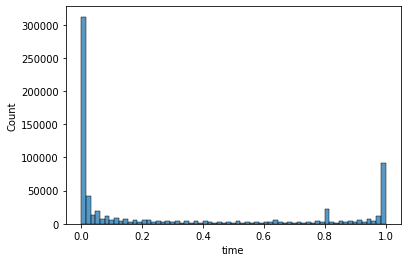

In [91]:
figure, ax = plt.subplots()
sns.histplot(pairs["time"], ax=ax)
pass

## Train Model

In [92]:
rdm = np.random.random(len(pairs))
train_data = pairs[rdm < 0.8]
val_data = pairs[(rdm >= 0.8) & (rdm < 0.9)]
test_data = pairs[rdm >= 0.9]

len(train_data), len(val_data), len(test_data)

(572587, 70915, 71742)

In [93]:
class ContextualRanker(pl.LightningModule):
    def __init__(self, embedding_dim=10):
        super().__init__()
        self.embedding_dim = embedding_dim
        
#         self.context = nn.Embedding(num_embeddings=50000, embedding_dim=self.embedding_dim)
        self.track = nn.Embedding(num_embeddings=50000, embedding_dim=self.embedding_dim)
        
        self.cosine_sim = nn.CosineSimilarity(dim=-1)


    def forward(self, x):
        emb = self.track(x[:, 0:2])
        context, track = emb[:, 0], emb[:, 1]
        
        res = self.cosine_sim(context, track) 
        return res
            
    def step(self, batch, batch_idx, metric, prog_bar=False):
        x, y = batch
        predictions = self.forward(x)
        loss = F.mse_loss(predictions, y.float(), reduction='mean')
        self.log(metric, loss, prog_bar=prog_bar)
        return loss

    def test_step(self, batch, batch_idx, prog_bar=False):
        x, y = batch
        predictions = self.forward(x)
        targets = y[:, 0].float()
        avgs = y[:, 1].float()
        rdms = y[:, 2].float()

        loss = F.mse_loss(predictions, targets, reduction='mean')
        avg_loss = F.mse_loss(avgs, targets, reduction='mean')
        rdm_loss = F.mse_loss(rdms, targets, reduction='mean')

        self.log("test_loss", loss, prog_bar=prog_bar)
        self.log("avg_loss", avg_loss, prog_bar=prog_bar)
        self.log("rdm_loss", rdm_loss, prog_bar=prog_bar)

    def training_step(self, batch, batch_idx):
        return self.step(batch, batch_idx, "train_loss")
    
    def validation_step(self, batch, batch_idx):
        return self.step(batch, batch_idx, "val_loss", True)
        
    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)
        lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)
        scheduler = {
            'scheduler': lr_scheduler,
            'reduce_on_plateau': True,
            'monitor': 'val_loss'
        }
        return [optimizer], [scheduler]

In [94]:
class ContextualRankerData(pl.LightningDataModule):
  def __init__(self, train_data, val_data, test_data, features):
      super().__init__()
      self.train_data = train_data
      self.val_data = val_data
      self.test_data = test_data
      self.features = features

  def prepare_data(self):
      self.test_data = self.test_data.assign(rdm = np.random.random(len(self.test_data))).assign(avg = self.train_data["time"].mean())

  def setup(self, stage=None):
      if stage == "fit" or stage is None:
        self.train_dataset = td.TensorDataset(
            torch.from_numpy(self.train_data[self.features].values), 
            torch.from_numpy(self.train_data["time"].values)
            )

        self.val_dataset = td.TensorDataset(
            torch.from_numpy(self.val_data[self.features].values), 
            torch.from_numpy(self.val_data["time"].values)
            )
        
      if stage == "test" or stage is None:  
        self.test_dataset = td.TensorDataset(
            torch.from_numpy(self.test_data[self.features].values),
            torch.from_numpy(self.test_data[["time", "avg", "rdm"]].values)
        )
  def train_dataloader(self):
      return td.DataLoader(self.train_dataset, batch_size=2048, shuffle=True, num_workers=0)

  def val_dataloader(self):
      return td.DataLoader(self.val_dataset, batch_size=2048, num_workers=0)

  def test_dataloader(self):
      return td.DataLoader(self.test_dataset, batch_size=512, shuffle=False, num_workers=0)

In [95]:
net = ContextualRanker(embedding_dim=100)
data_module = ContextualRankerData(train_data, val_data, test_data, features = ["start", "track"])

checkpoint_callback = pl.callbacks.ModelCheckpoint(monitor="val_loss")

trainer = pl.Trainer(
    max_epochs=300,
    accelerator='gpu', 
    devices=1,
    callbacks=[
        pl.callbacks.early_stopping.EarlyStopping(monitor="val_loss", patience=5),
        pl.callbacks.LearningRateMonitor(logging_interval="step"),
        checkpoint_callback
    ])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [96]:
trainer.fit(
    net, 
    data_module
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name       | Type             | Params
------------------------------------------------
0 | track      | Embedding        | 5.0 M 
1 | cosine_sim | CosineSimilarity | 0     
------------------------------------------------
5.0 M     Trainable params
0         Non-trainable params
5.0 M     Total params
20.000    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/v_shaposhnikov/env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/v_shaposhnikov/env/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 40 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 00035: reducing learning rate of group 0 to 1.0000e-04.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 00046: reducing learning rate of group 0 to 1.0000e-05.


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [103]:
best = ContextualRanker.load_from_checkpoint(checkpoint_callback.best_model_path, embedding_dim=100)

In [104]:
trainer.test(best, data_module)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        avg_loss            0.15447917580604553
        rdm_loss             0.27946737408638
        test_loss           0.0984463095664978
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.0984463095664978,
  'avg_loss': 0.15447917580604553,
  'rdm_loss': 0.27946737408638}]

In [99]:
{'test_loss': 0.10975378006696701,
  'avg_loss': 0.15447917580604553,
  'rdm_loss': 0.2776205241680145}

{'test_loss': 0.10975378006696701,
 'avg_loss': 0.15447917580604553,
 'rdm_loss': 0.2776205241680145}

## Compute top recommendations

In [105]:
track_meta = pd.read_json("env/tracks.json", lines=True)
# track_meta = pd.read_json("./tracks.json", lines=True)

In [119]:
# context_embeddings = dict(best.named_parameters())["context.weight"].data.cpu().numpy()
track_embeddings = dict(best.named_parameters())["track.weight"].data.cpu().numpy()

In [120]:
track_meta.head()

,artist,title,track
0,Jack Johnson,The Cove,0
1,Billy Preston,Nothing from Nothing,1
2,Paco De Lucia,Entre Dos Aguas,2
3,Josh Rouse,Under Cold Blue Stars,3
4,The Dead 60s,Riot Radio (Soundtrack Version),4


In [124]:
from numpy.linalg import norm


In [125]:
def get_cosine_diffs(track_embeddings, embedding, EPS=1e-6):
    dot = np.dot(track_embeddings, embedding.T)
    dot = dot / (np.maximum(norm(track_embeddings, axis=-1) * norm(embedding, axis=-1), EPS))
    return dot

In [126]:
k = 100
with open('./' + "tracks_hw_recs.json", "w") as rf:
    for _, track in tqdm.tqdm(track_meta.iterrows()):
        embedding = track_embeddings[track["track"]]
        neighbours = np.argpartition(-get_cosine_diffs(track_embeddings, embedding), k)[:k]
        
        recommendation = dict(track)
        recommendation["recommendations"] = neighbours.tolist()
        
        rf.write(json.dumps(recommendation) + "\n")

50000it [28:56, 28.80it/s]


In [127]:
track = 3916
embedding = context_embeddings[track]
track_meta.loc[track_meta["track"] == track, ["artist", "title"]]

,artist,title
3916,Florence + The Machine,Bird Song


In [128]:
k = 10
neighbours = np.argpartition(-np.dot(track_embeddings, embedding), k)[:k]
track_meta.loc[track_meta["track"].isin(neighbours), ["artist", "title"]]

,artist,title
1531,Guns N' Roses,Paradise City
5010,Queens Of The Stone Age,No One Knows
5198,Metallica / Marianne Faithfull,The Memory Remains
7773,Heart,Crazy On You
12293,Guns N' Roses,Estranged
12826,1990s,Enjoying Myself
15431,Evanescence,My Last Breath
17443,Audioslave,Shadow On The Sun
24241,Foo Fighters,For All The Cows
30950,Nightwish,Ever Dream
